# Learning in Machine and Brain

## Ali Jabbari 
### Assignment 1 

In [5]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
! cd "C:\Users\alija\Desktop\"

In [4]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns




images = scipy.io.loadmat(r'C:\Users\alija\Desktop\Data_hoda_full.mat',variable_names='Data',appendmat=True ,mat_dtype =0).get('Data')


In [5]:

# Load the .mat file
mat_data = scipy.io.loadmat(r'C:\Users\alija\Desktop\Data_hoda_full.mat')

# Inspect the variable names in the loaded .mat file
variable_names = mat_data.keys()
print (variable_names)
# Extract the labels of the pictures (assuming they are stored in a variable, e.g., 'labels')
# Replace 'labels' with the actual variable name in your .mat file
if 'labels' in variable_names:
    labels = mat_data['labels']
    print("Labels found in the .mat file:")
    print(labels)
else:
    print("No 'labels' variable found in the .mat file.")

np.shape (labels)


dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])
Labels found in the .mat file:
[[6]
 [5]
 [0]
 ...
 [2]
 [6]
 [6]]


(60000, 1)

In [6]:
images = (images.tolist())
for i in range(len(images)):
  images[i][0][0] = (images[i][0][0].tolist())
  images[i][0] = (images[i][0].tolist())

In [7]:

image_data = mat_data['Data']



In [8]:
shapes = []
for i in images :
  shapes.append(np.shape(i)[1:])
print(max(shapes))


(62, 35)


In [9]:
image_data.shape 

(60000, 1)

In [10]:
original_images = []
for i in images :
  original_images.append (i[0])

In [11]:
# Define the target shape as (64, 64)
target_shape = (64, 64)

padded_images = []

for image in original_images:
    original_shape = np.shape (image)
    pad_x = max(0, target_shape[0] - original_shape[0])
    pad_y = max(0, target_shape[1] - original_shape[1])

    padded_image = np.pad(image, ((0, pad_x), (0, pad_y)), 'constant', constant_values=0)

    padded_images.append(padded_image)

padded_images = np.array(padded_images)


print(padded_images.shape)


(60000, 64, 64)


In [14]:

# Define the target shape (64x64)
target_shape = (64, 64)

# Create a list to store the padded and centered images
padded_images = []

for image in original_images:
    # Get the current image shape
    current_shape = np.shape(image)

    # Calculate the padding values for both dimensions
    pad_width = [(0, 0), (0, 0)]

    for i in range(2):
        if current_shape[i] < target_shape[i]:
            pad_amount = target_shape[i] - current_shape[i]
            pad_left = pad_amount // 2
            pad_right = pad_amount - pad_left
            pad_width[i] = (pad_left, pad_right)

    padded_image = np.pad(image, pad_width, mode='constant', constant_values=0)

    padded_images.append(padded_image)

padded_images = np.array(padded_images)


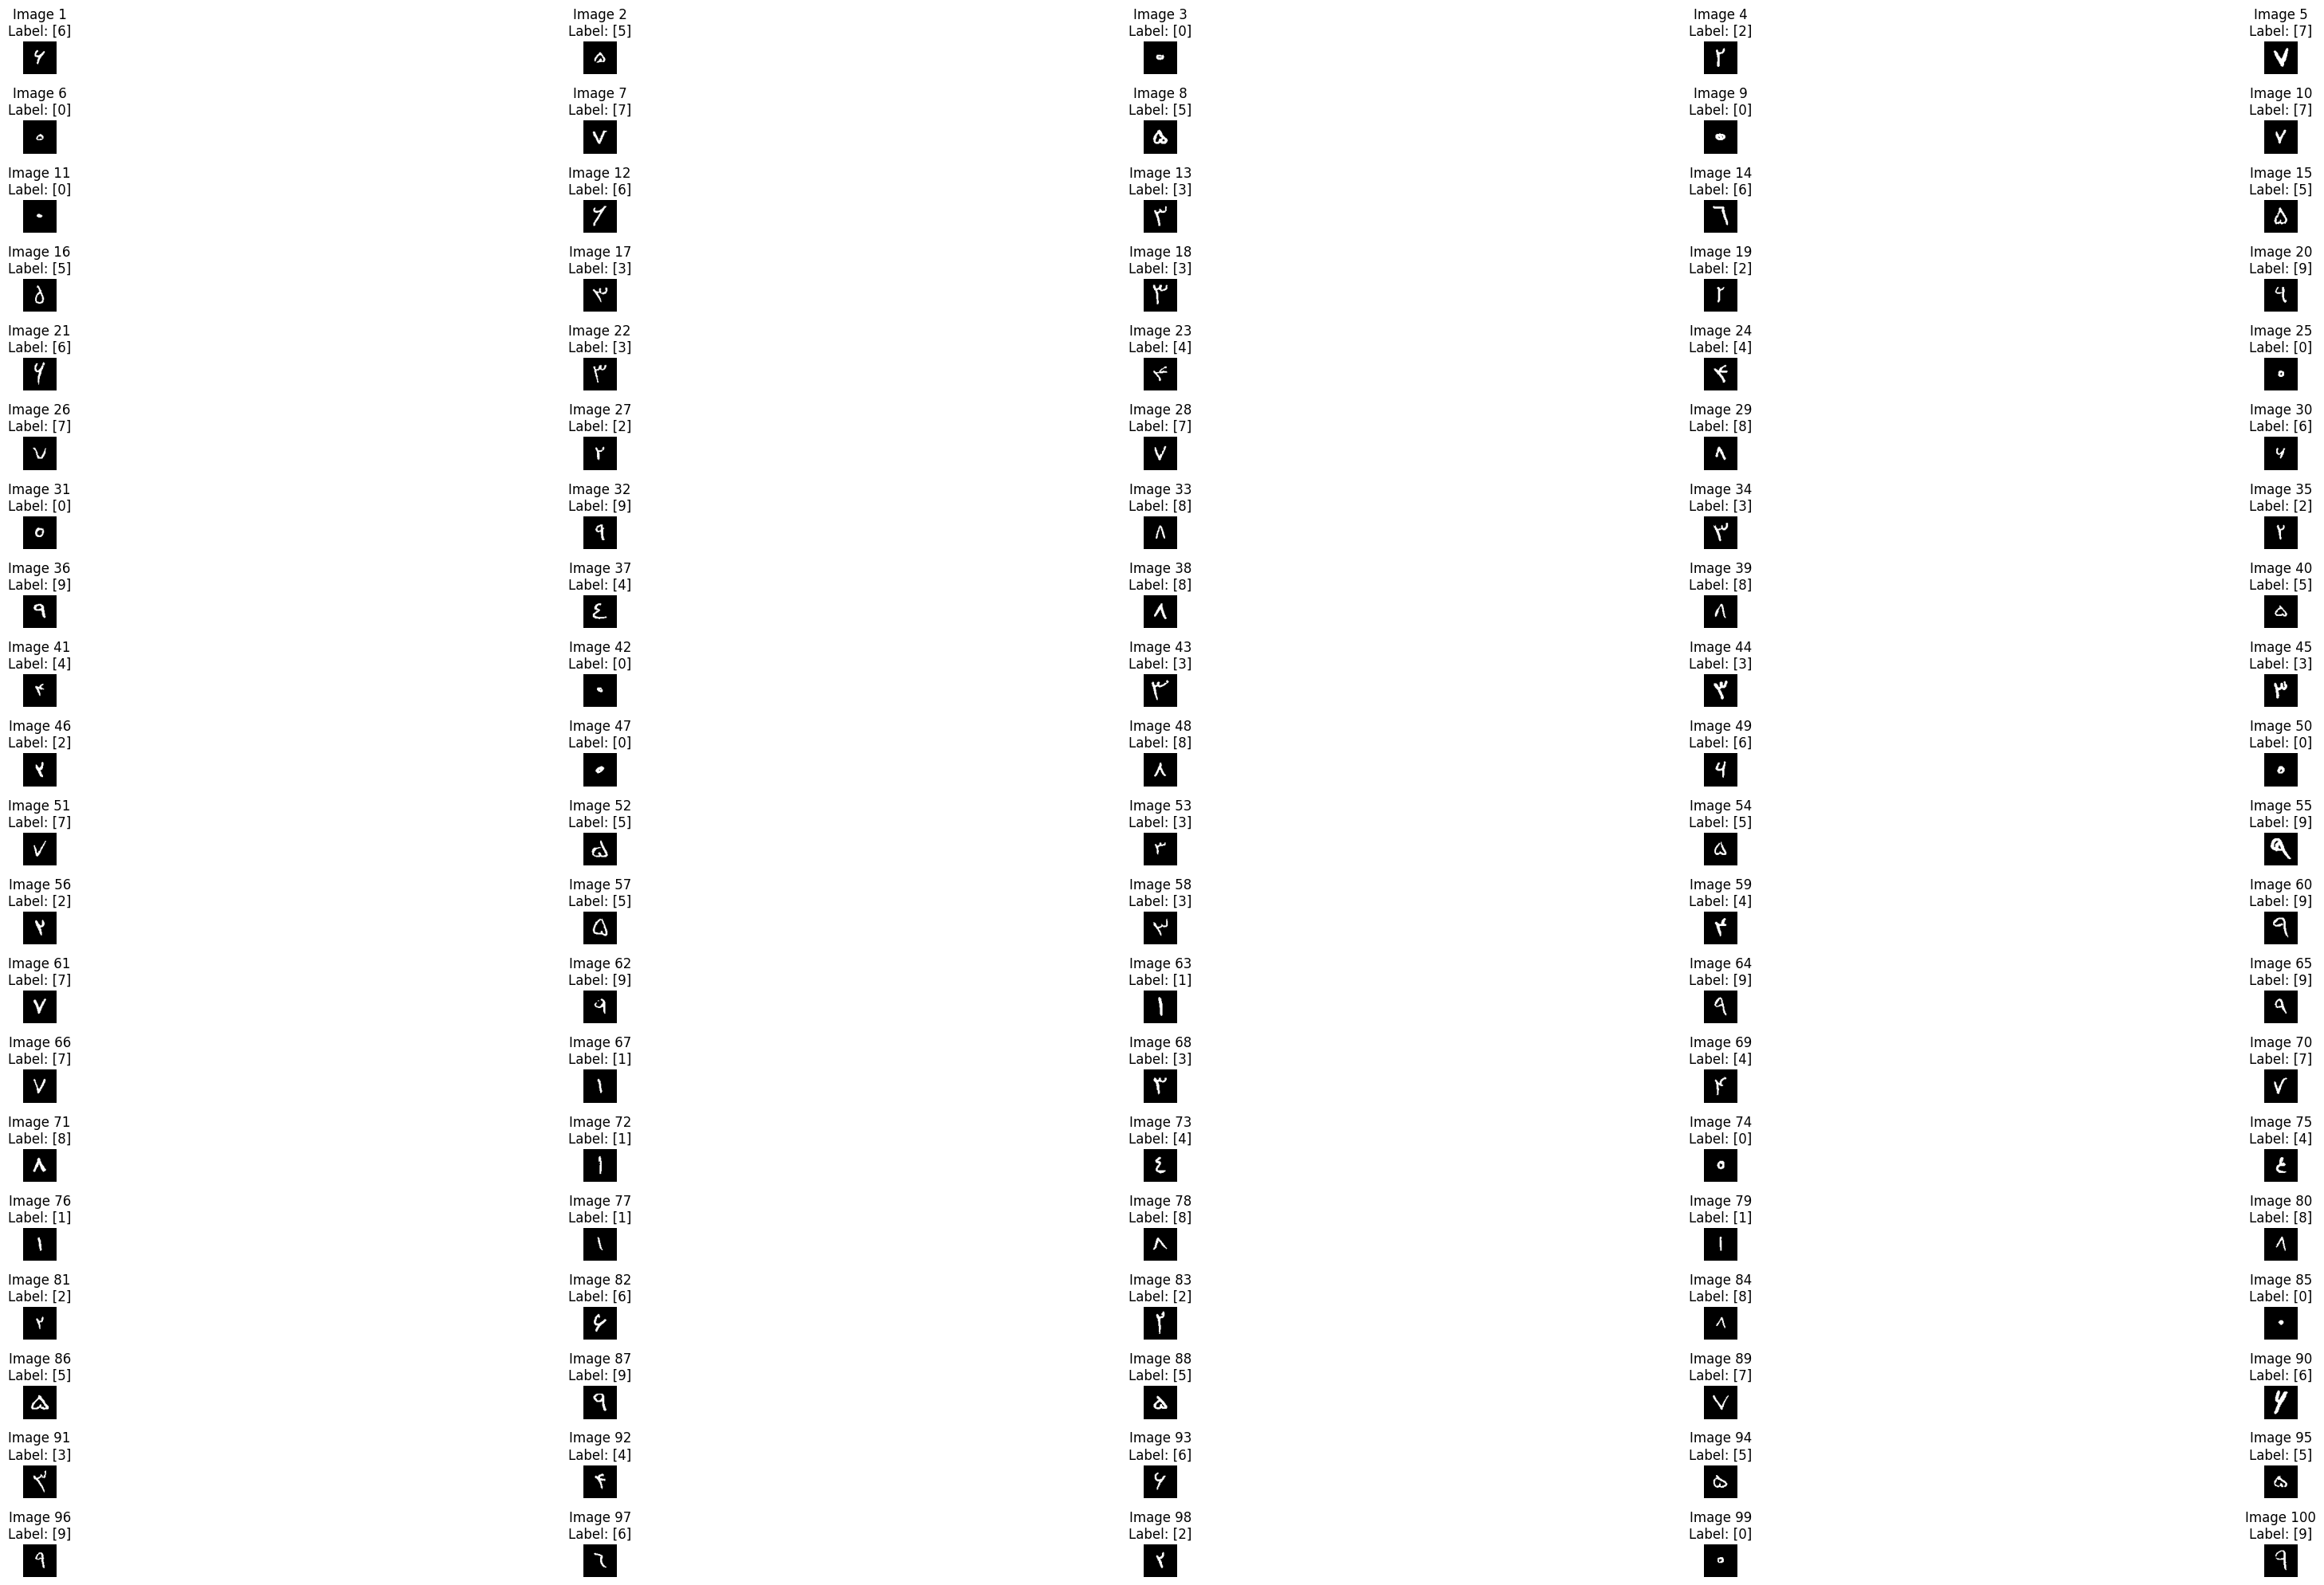

In [15]:

# Assuming you have a list of images and labels
num_images_to_plot = 100

# Create a figure and axes for the subplots
fig, axes = plt.subplots(20, 5, figsize=(40, 20))

# Flatten the 2D axes array for easy iteration
axes = axes.flatten()

# Plot the first 10 images with labels
for i in range(num_images_to_plot):
    ax = axes[i]
    ax.imshow(padded_images[i], cmap='gray')
    ax.set_title(f"Image {i + 1}\nLabel: {labels[i]}")  # Add label information
    ax.axis('off')

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()


In [ ]:
'''
import os
import matplotlib.pyplot as plt

# Create a directory to save the images
save_dir = r'C:\Users\alija\Desktop\Hoda'
os.makedirs(save_dir, exist_ok=True)

# Loop through the padded images and save each one
for i, image in enumerate(padded_images):
    # Define the file name for each image (e.g., "image_0.png", "image_1.png", ...)
    file_name = os.path.join(save_dir, f"image_{i}.png")
    
    # Save the image using matplotlib
    plt.imsave(file_name, image, cmap='gray')

print(f"All images saved in the directory: {save_dir}")


'''



SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 99-100: truncated \UXXXXXXXX escape (2830320319.py, line 20)

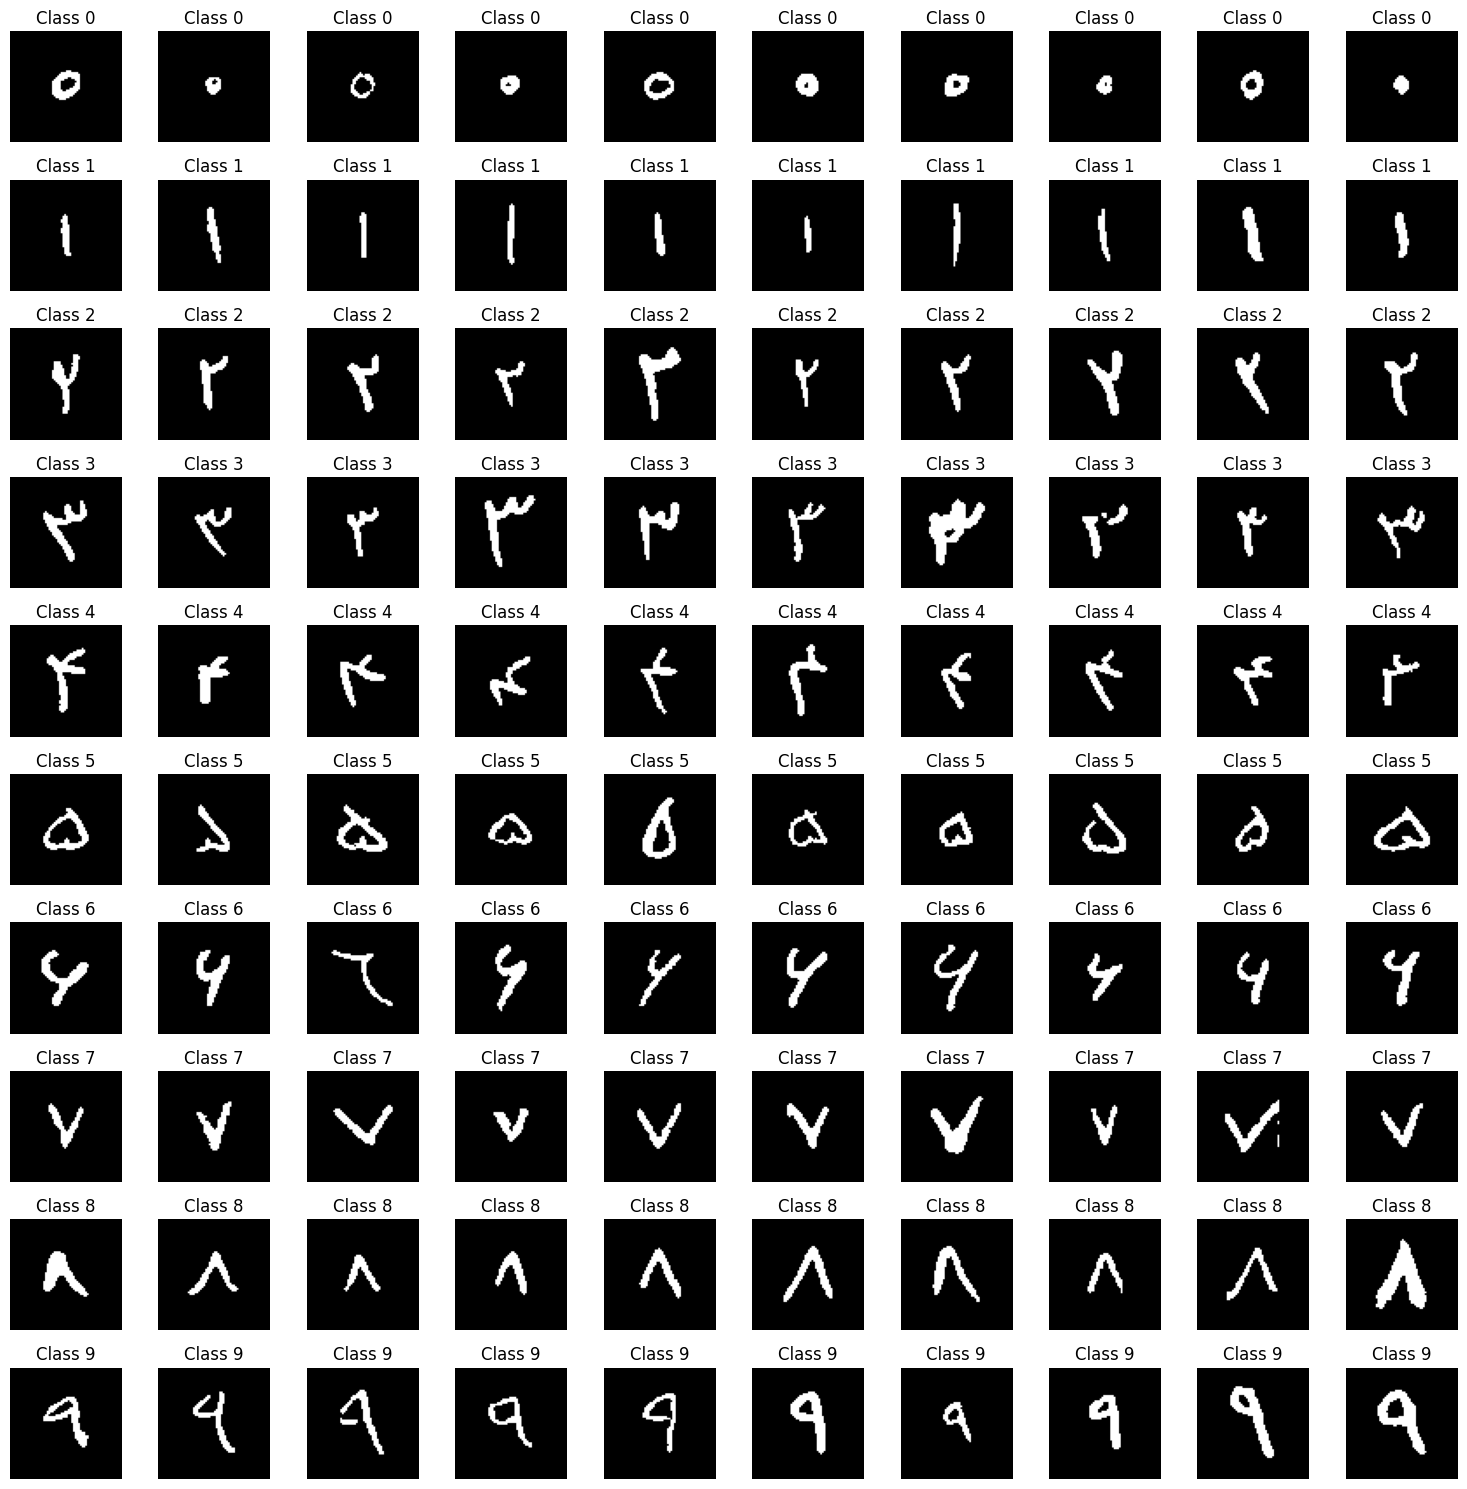

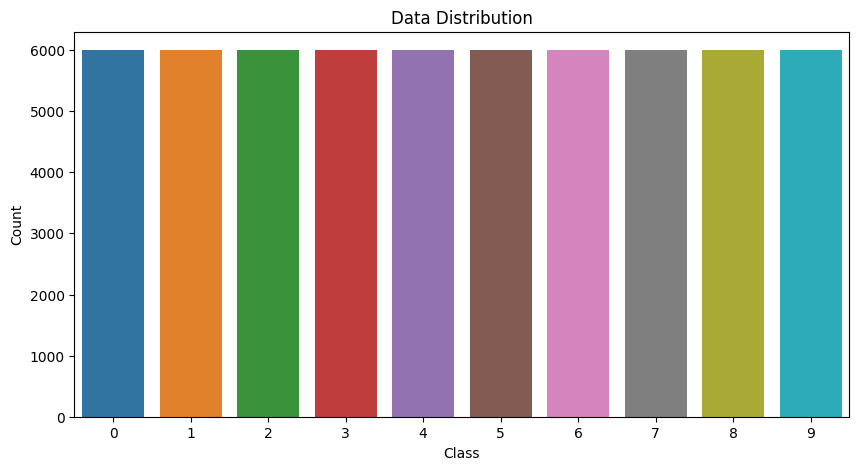

Number of samples in each class:
Class 0: 6000 samples
Class 1: 6000 samples
Class 2: 6000 samples
Class 3: 6000 samples
Class 4: 6000 samples
Class 5: 6000 samples
Class 6: 6000 samples
Class 7: 6000 samples
Class 8: 6000 samples
Class 9: 6000 samples


In [16]:
num_classes = 10  
samples_per_class = 10  

fig, axes = plt.subplots(num_classes, samples_per_class, figsize=(15, 15))

for class_num in range(num_classes):
    samples = np.random.choice(np.where(labels == class_num)[0], samples_per_class, replace=False)
    
    for i, sample_idx in enumerate(samples):
        ax = axes[class_num, i]
        ax.imshow(padded_images[sample_idx], cmap='gray')
        ax.set_title(f"Class {class_num}")
        ax.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x=labels.flatten())
plt.title("Data Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

class_counts = [np.sum(labels == class_num) for class_num in range(num_classes)]
print("Number of samples in each class:")
for class_num, count in enumerate(class_counts):
    print(f"Class {class_num}: {count} samples")


In [17]:

num_classes = 10

# Initialize variables to store selected samples and labels
selected_samples = []
selected_labels = []

# Set the desired number of samples per class
samples_per_class = 400  

for class_num in range(num_classes):
    # Get indices of samples for the current class
    class_indices = np.where(labels == class_num)[0]
    
    # Randomly sample the desired number of samples for this class
    selected_samples.extend(np.random.choice(class_indices, samples_per_class, replace=False))
    selected_labels.extend([class_num] * samples_per_class)

selected_padded_images = padded_images[selected_samples]
selected_labels = np.array(selected_labels)

print("Selected Padded Images Shape:", selected_padded_images.shape)
print("Selected Labels Shape:", selected_labels.shape)


Selected Padded Images Shape: (4000, 64, 64)
Selected Labels Shape: (4000,)


In [18]:

def calculate_feature_vector_with_threshold(image, threshold=0.5):

    binary_image = (image > threshold).astype(int)
    
    # Calculate horizontal and vertical projections
    horizontal_projection = np.sum(binary_image, axis=1)
    vertical_projection = np.sum(binary_image, axis=0)
    
    # Create a feature vector by concatenating the two projections
    feature_vector = np.concatenate((horizontal_projection, vertical_projection))
    
    return feature_vector

def calculate_feature_vector_without_threshold(image):
    horizontal_projection = np.sum(image, axis=1)
    vertical_projection = np.sum(image, axis=0)
    
    # Create a feature vector by concatenating the two projections
    feature_vector = np.concatenate((horizontal_projection, vertical_projection))
    
    return feature_vector

histogram_feature_vectors_with_threshold = [calculate_feature_vector_with_threshold(image) for image in selected_padded_images]
histogram_feature_vectors_without_threshold = [calculate_feature_vector_without_threshold(image) for image in selected_padded_images]


In [19]:
np.shape (histogram_feature_vectors_with_threshold)

(4000, 128)

In [20]:
np.shape (histogram_feature_vectors_without_threshold)

(4000, 128)

===========


In [21]:
NORTH = 0
NORTH_EAST = 1
EAST = 2
SOUTH_EAST = 3
SOUTH = 4
SOUTH_WEST = 5
WEST = 6
NORTH_WEST = 7

offsets = {
    NORTH: (0, -1),
    NORTH_EAST: (1, -1),
    EAST: (1, 0),
    SOUTH_EAST: (1, 1),
    SOUTH: (0, 1),
    SOUTH_WEST: (-1, 1),
    WEST: (-1, 0),
    NORTH_WEST: (-1, -1)
}

num_zones = 5

def get_next_point(point, direction):
    # Get the offset for the direction
    dx, dy = offsets[direction]
    # Add the offset to the point coordinates
    x, y = point
    return x + dx, y + dy

# Define a function to get the Freeman direction between two points
def get_direction(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    dx = x2 - x1
    dy = y2 - y1
    # Find the direction that matches the difference
    for direction, offset in offsets.items():
        if offset == (dx, dy):
            return direction
    # If no direction matches, return None
    return None

def extract_local_chain_code_features(image):
    if image.dtype != np.uint8:
        image = image.astype(np.uint8)
    # Check if the image is grayscale and has the correct size
    if len(image.shape) != 2 or image.shape != (64, 64):
        raise ValueError("The image must be grayscale and have a size of 64x64 pixels")
    
    # Binarize the image
    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Find the contours of the image
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    largest_contour = max(contours, key=cv2.contourArea)
    contour_points = [(x[0][0], x[0][1]) for x in largest_contour]
    
    contour_directions = []
    
    for i in range(len(contour_points)):
        current_point = contour_points[i]
        previous_point = contour_points[i-1] 
        
        direction = get_direction(previous_point, current_point)
        contour_directions.append(direction)
    
    layers = {}
    
    for direction in range(8):
        layer = np.zeros_like(binary)
        
        for point, dir in zip(contour_points, contour_directions):
            if dir == direction:
                x, y = point
                layer[y][x] = 255
        
        layers[direction] = layer
    
    feature_vector = []
    
    for direction in range(8):
        layer = layers[direction]
        
        height, width = layer.shape
        
        zone_height = height // num_zones
        zone_width = width // num_zones
        
        for i in range(num_zones):
            for j in range(num_zones):
                x = j * zone_width
                y = i * zone_height
                
                zone = layer[y:y+zone_height, x:x+zone_width]
                
                mean = np.mean(zone)
                feature_vector.append(mean)
    
    return np.array(feature_vector)

local_chain_code_binarized_features_vector = [extract_local_chain_code_features(image) for image in selected_padded_images]

In [22]:
np.shape (local_chain_code_binarized_features_vector)

(4000, 200)


**Local Chain Code Features Extraction from Grayscale Images**

In this section, we describe the process of extracting local chain code features from a grayscale image. The goal of this feature extraction is to describe the local patterns and contours of an object of interest within the image. The process is conducted on images of size 64x64 pixels.

**1. Preprocessing:**

Before feature extraction, we perform some preprocessing steps to prepare the image:

- **Binarization**: The grayscale image is binarized using Otsu's thresholding. This converts the image into a binary format, with the object of interest in white (pixel value 255) and the background in black (pixel value 0).

**2. Contour Extraction:**

- **Contour Detection**: We use OpenCV's `findContours` function to detect the contours in the binarized image. These contours represent the boundaries of the object of interest, which is assumed to be the largest contour in the image.

- **Contour Points**: The coordinates of the contour points are extracted as a list of tuples. These points represent the contour's path within the image.

**3. Freeman Chain Code:**

- **Direction Estimation**: For each pair of consecutive contour points, we estimate the direction of the transition between them. The direction is represented using the Freeman chain code, which is an 8-direction code. The direction information is stored as a list of chain code values. The chain code represents the orientation of the contour path between points.

- **Algorithm**:
  - For each pair of consecutive contour points (point1 and point2), calculate the difference in x and y coordinates (dx and dy).
  - Match the difference (dx, dy) to one of the 8 predefined Freeman chain code directions (NORTH, NORTH_EAST, EAST, etc.).
  - Store the chain code direction in a list, representing the chain code for the entire contour.

**4. Layer Creation:**

- **Directional Layers**: We create eight directional layers, one for each of the eight Freeman chain code directions. Each layer is a binary image with the same dimensions as the original binary image. In each layer, only the pixels corresponding to contour points with the matching chain code direction are set to 255 (white), while others remain 0 (black).

- **Algorithm**:
  - For each direction in the 8-directional Freeman code:
    - Initialize an empty layer with zeros (black pixels).
    - Iterate through the contour points and their corresponding chain code directions.
    - If the direction matches the current layer direction, set the pixel in the layer to 255 (white) at the corresponding contour point.

**5. Zone Partitioning:**

- **Partitioning into Zones**: Each directional layer is partitioned into a grid of 5x5 zones. Each zone represents a local area of the image, and we aim to capture the average pixel value within each zone.

- **Algorithm**:
  - For each directional layer:
    - Calculate the height and width of the layer.
    - Divide the layer into 5x5 equally sized zones.
    - For each zone, calculate the mean pixel value within that zone.
    - Append the mean value to the feature vector.

**6. Feature Vector Creation:**

- **Feature Vector**: The final feature vector consists of the averaged pixel values from the 5x5 zones in each of the eight directional layers. The feature vector has a total of 200 elements (8 directions * 5 zones * 5 zones).

**7. Output**:

- The output of the feature extraction process is a feature vector that encodes the local chain code information for the object of interest within the image.

By following these steps, the feature vector captures the local pattern and contour information in a structured manner, allowing for the representation and analysis of digit images. This feature vector can be used in various machine learning applications, such as digit recognition.
---

---

---


# without binarization 

====================




---

The effect of binarization in the context of extracting local chain code features is significant and essential. Binarization serves the purpose of simplifying the image and focusing on the object's contour or boundary. Here are some reasons why binarization is necessary and the impact of not binarizing the image:

**1. Simplification of Image:**
   - Binarization reduces the grayscale image to a binary format, making it easier to identify the object's boundary by separating it from the background.

**2. Object Isolation:**
   - Binarization helps to isolate the object (the digit in this case) from the background. The object becomes white (255) on a black (0) background, making it distinguishable.

**3. Contour Detection:**
   - Binarization enhances the effectiveness of contour detection algorithms. Contours represent the object's boundaries and are essential for local chain code feature extraction. Without binarization, it's more challenging to accurately identify and trace the object's contour.

**4. Chain Code Direction Estimation:**
   - Chain code direction estimation is based on the transition between consecutive contour points. Binarization is crucial for distinguishing these transitions. In a grayscale image, the transition between different shades of gray could introduce ambiguity in chain code direction estimation.

**5. Uniform Zones:**
   - When partitioning the directional layers into zones, binarization ensures that each zone's region contains clear boundaries between the object and the background. Without binarization, the variations in grayscale levels may lead to less distinct zones.

**6. Consistency:**
   - Binarization provides a consistent representation of the object across all the chain code directions and layers. This consistency simplifies the subsequent steps of feature extraction.



In [23]:

NORTH = 0
NORTH_EAST = 1
EAST = 2
SOUTH_EAST = 3
SOUTH = 4
SOUTH_WEST = 5
WEST = 6
NORTH_WEST = 7

offsets = {
    NORTH: (0, -1),
    NORTH_EAST: (1, -1),
    EAST: (1, 0),
    SOUTH_EAST: (1, 1),
    SOUTH: (0, 1),
    SOUTH_WEST: (-1, 1),
    WEST: (-1, 0),
    NORTH_WEST: (-1, -1)
}

num_zones = 5

def get_next_point(point, direction):
    dx, dy = offsets[direction]
    x, y = point
    return x + dx, y + dy

def get_direction(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    dx = x2 - x1
    dy = y2 - y1
    for direction, offset in offsets.items():
        if offset == (dx, dy):
            return direction
    return None

def extract_local_chain_code_features_unbinari(image):
    if image.dtype != np.uint8:
        image = image.astype(np.uint8)
    if len(image.shape) != 2 or image.shape != (64, 64):
        raise ValueError("The image must be grayscale and have a size of 64x64 pixels")
    
    
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    largest_contour = max(contours, key=cv2.contourArea)
    contour_points = [(x[0][0], x[0][1]) for x in largest_contour]
    
    contour_directions = []
    
    for i in range(len(contour_points)):
        current_point = contour_points[i]
        previous_point = contour_points[i-1] 
        
        direction = get_direction(previous_point, current_point)
        contour_directions.append(direction)
    
    layers = {}
    
    for direction in range(8):
        layer = np.zeros_like(image)
        
        for point, dir in zip(contour_points, contour_directions):
            if dir == direction:
                x, y = point
                layer[y][x] = 255
        
        layers[direction] = layer
    
    feature_vector = []
    
    for direction in range(8):
        layer = layers[direction]
        
        height, width = layer.shape
        
        zone_height = height // num_zones
        zone_width = width // num_zones
        
        for i in range(num_zones):
            for j in range(num_zones):
                x = j * zone_width
                y = i * zone_height
                
                zone = layer[y:y+zone_height, x:x+zone_width]
                
                mean = np.mean(zone)
                feature_vector.append(mean)
    
    return np.array(feature_vector)

local_chain_code_unbinarized_features_vector = [extract_local_chain_code_features_unbinari(image) for image in selected_padded_images]

c:\Users\alija\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alija\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alija\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

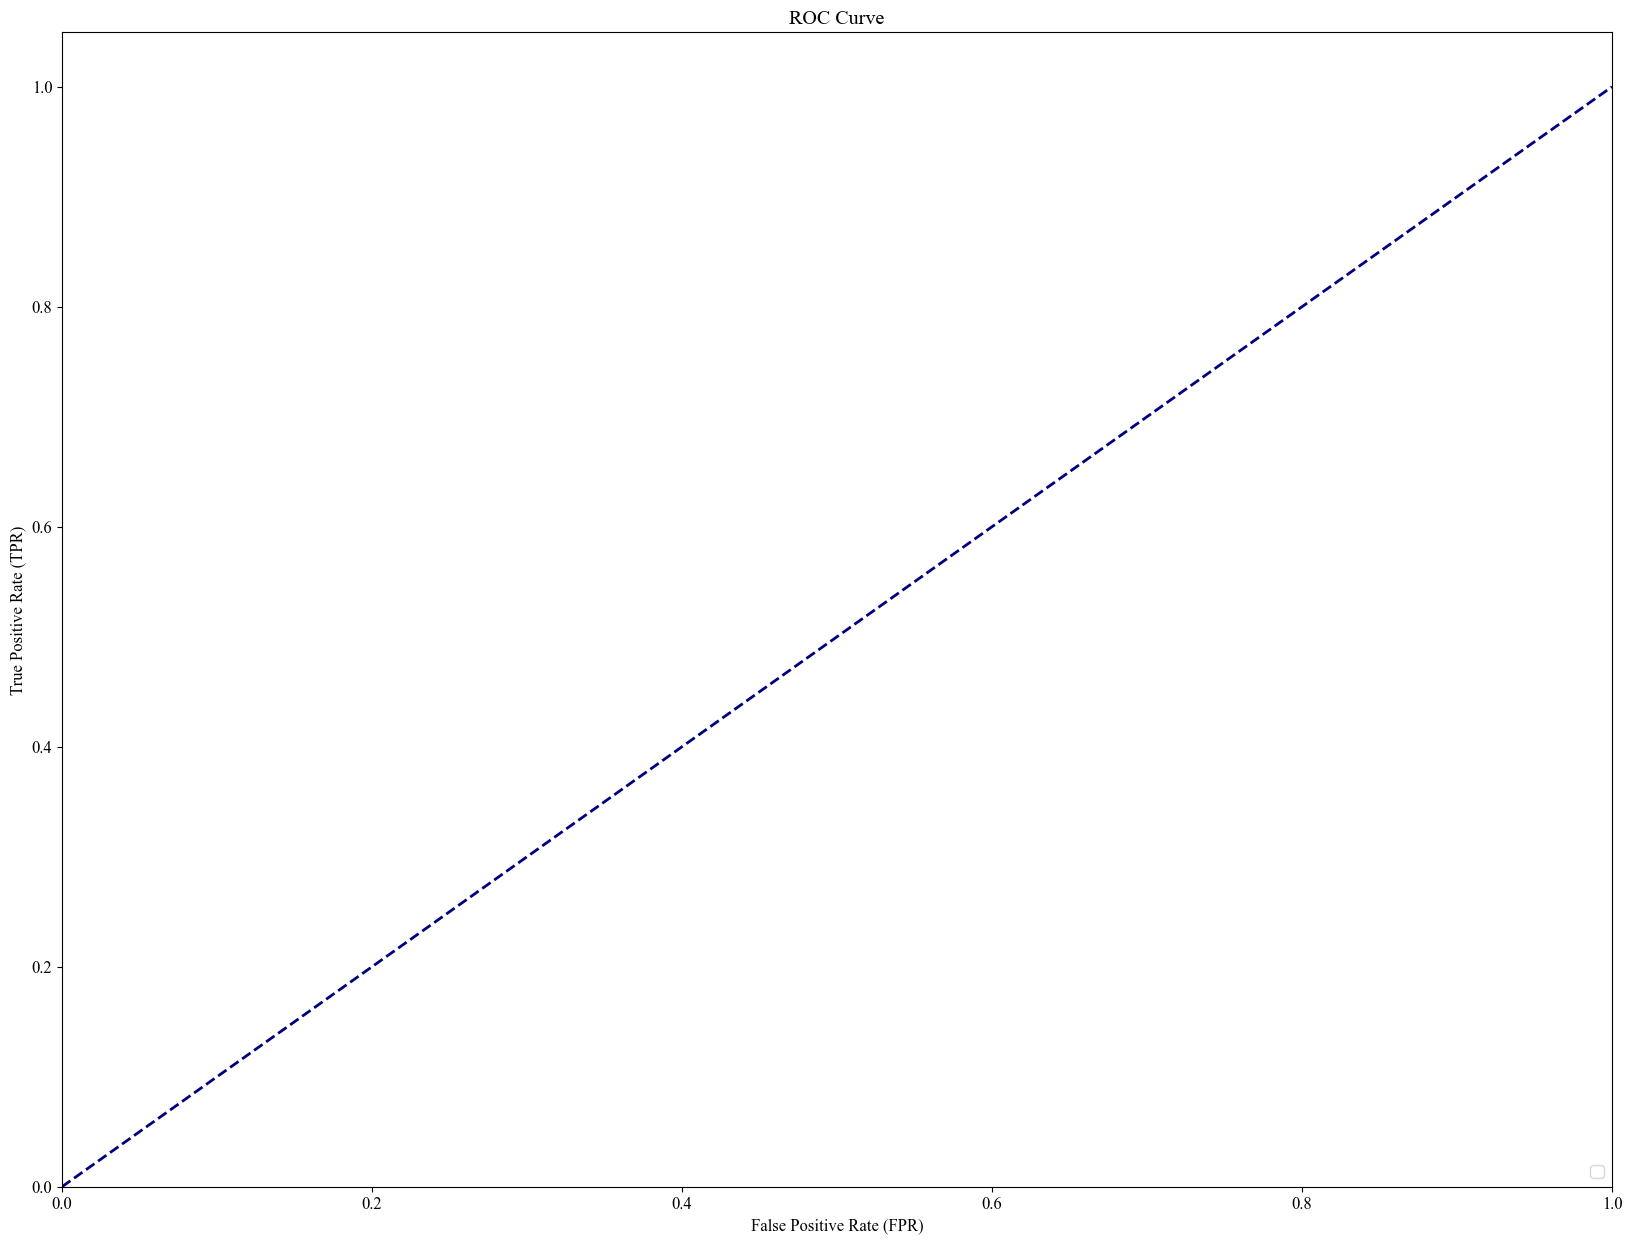

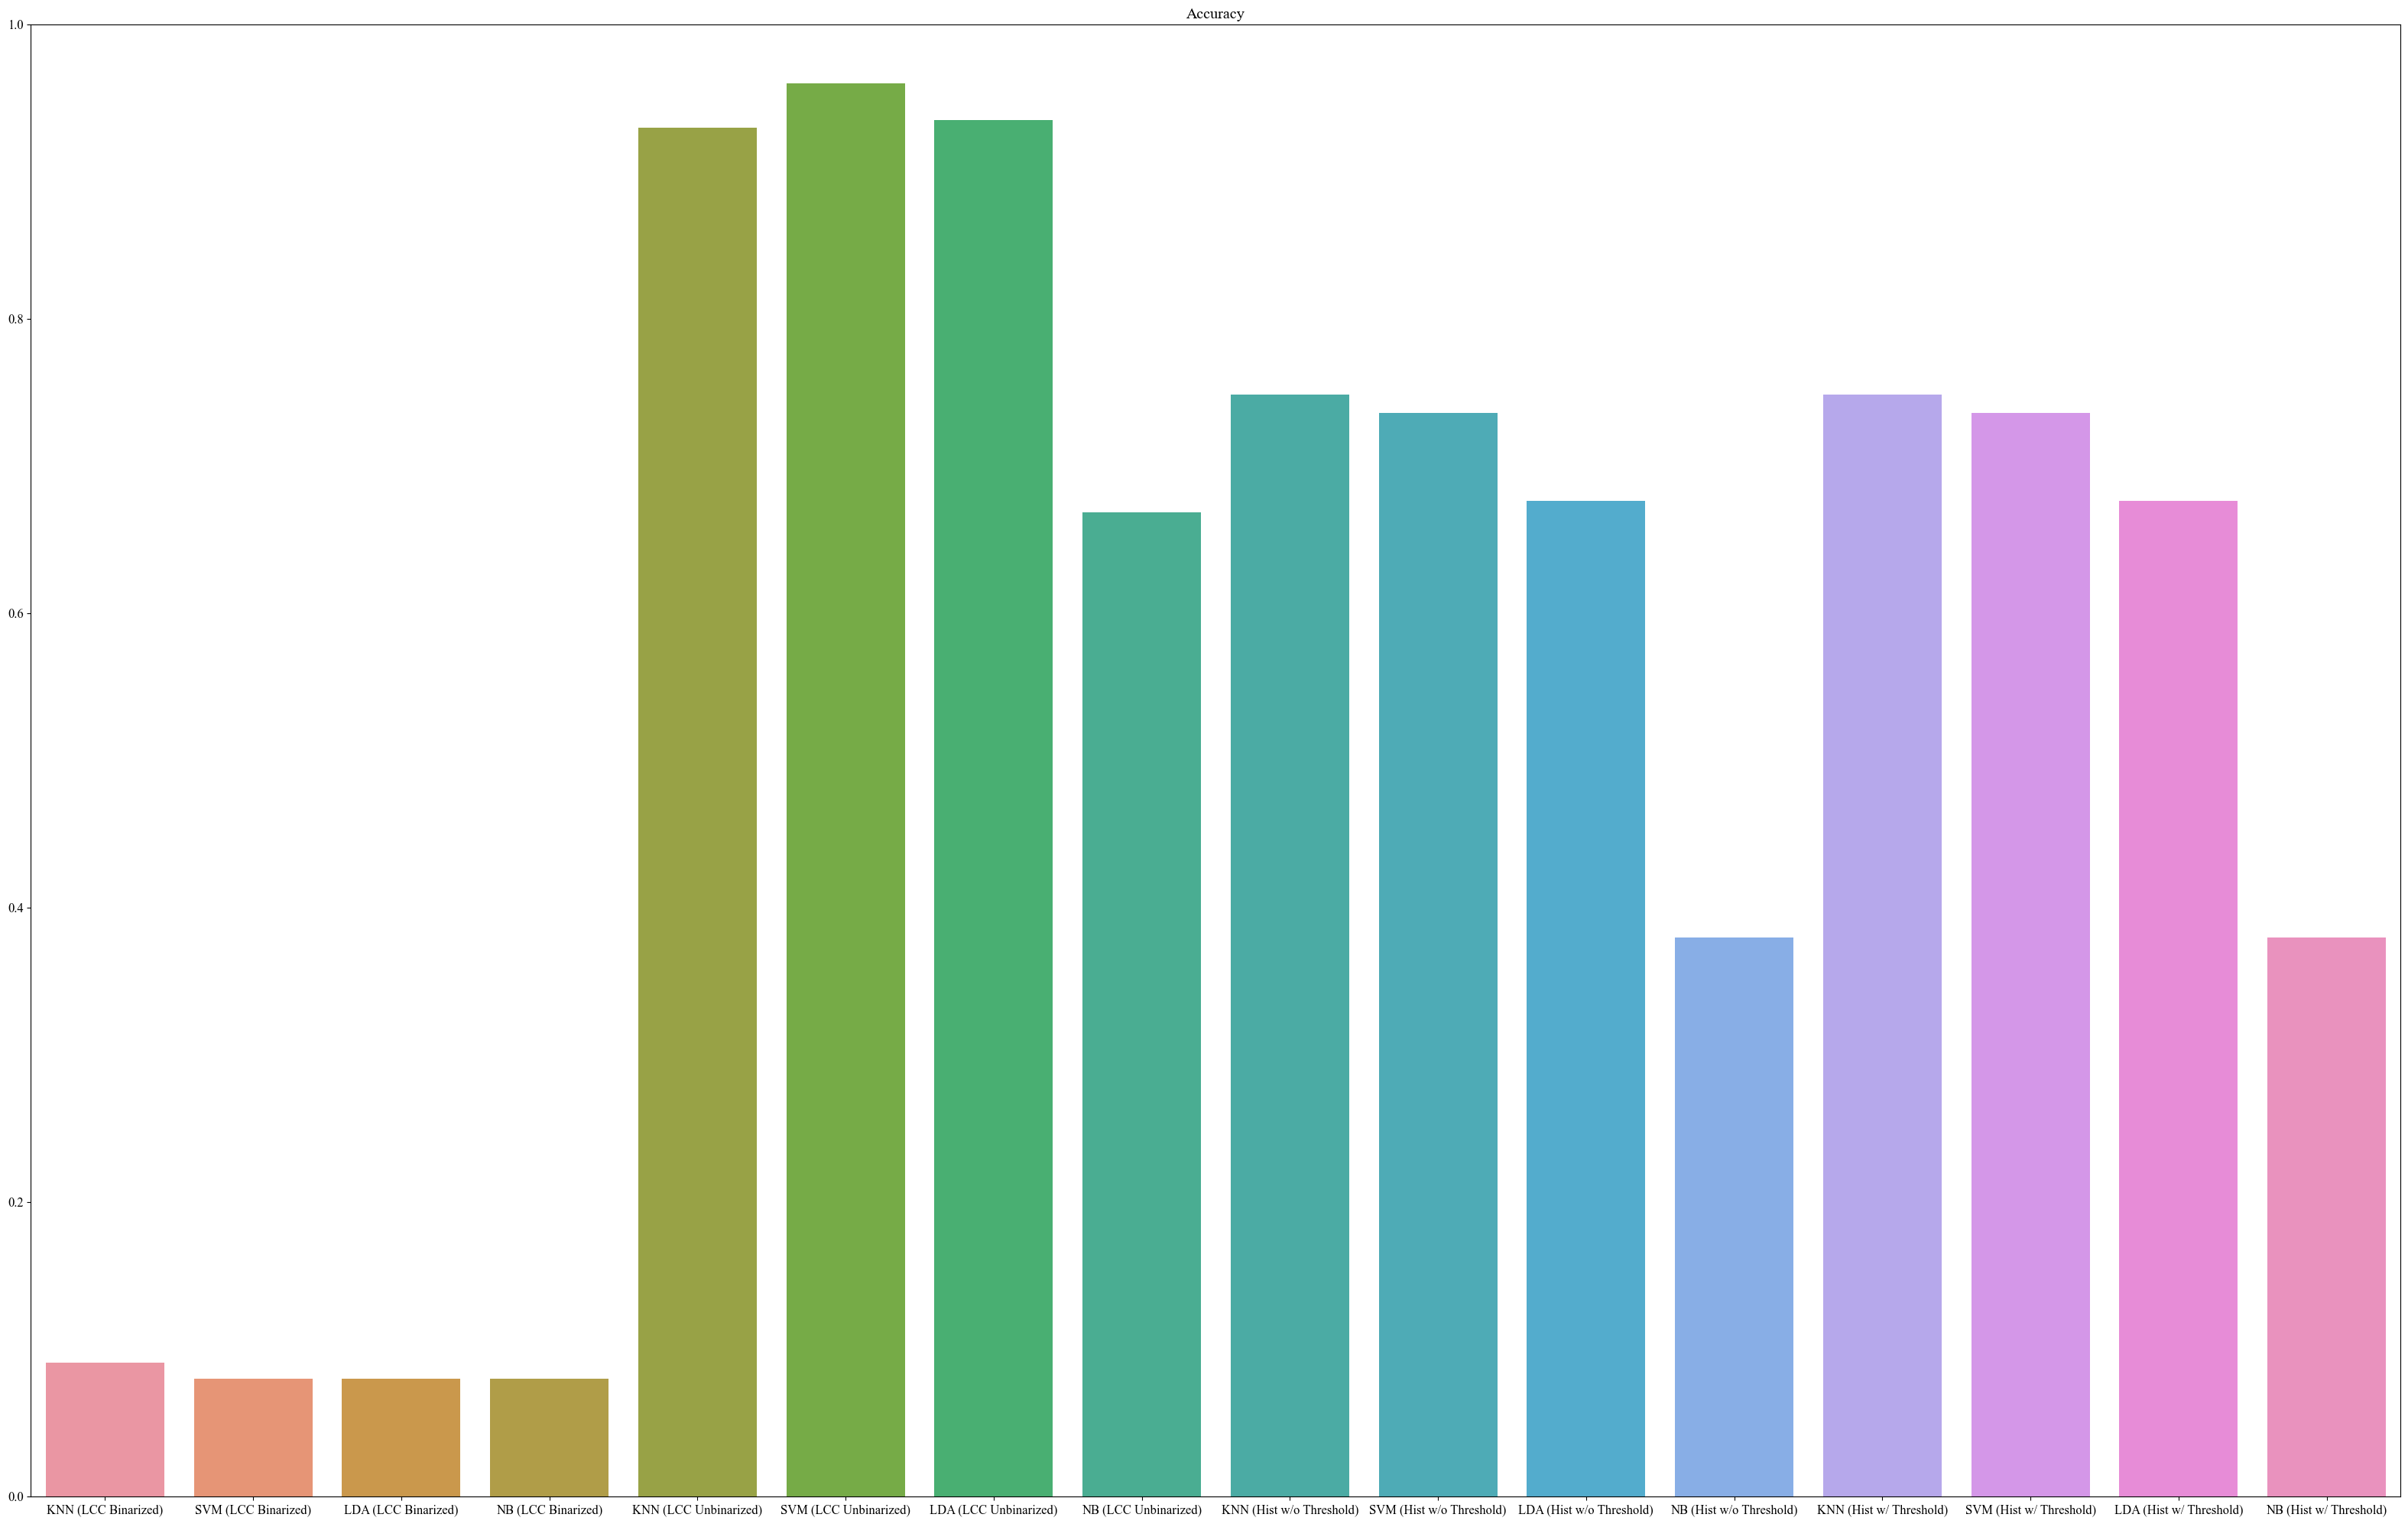

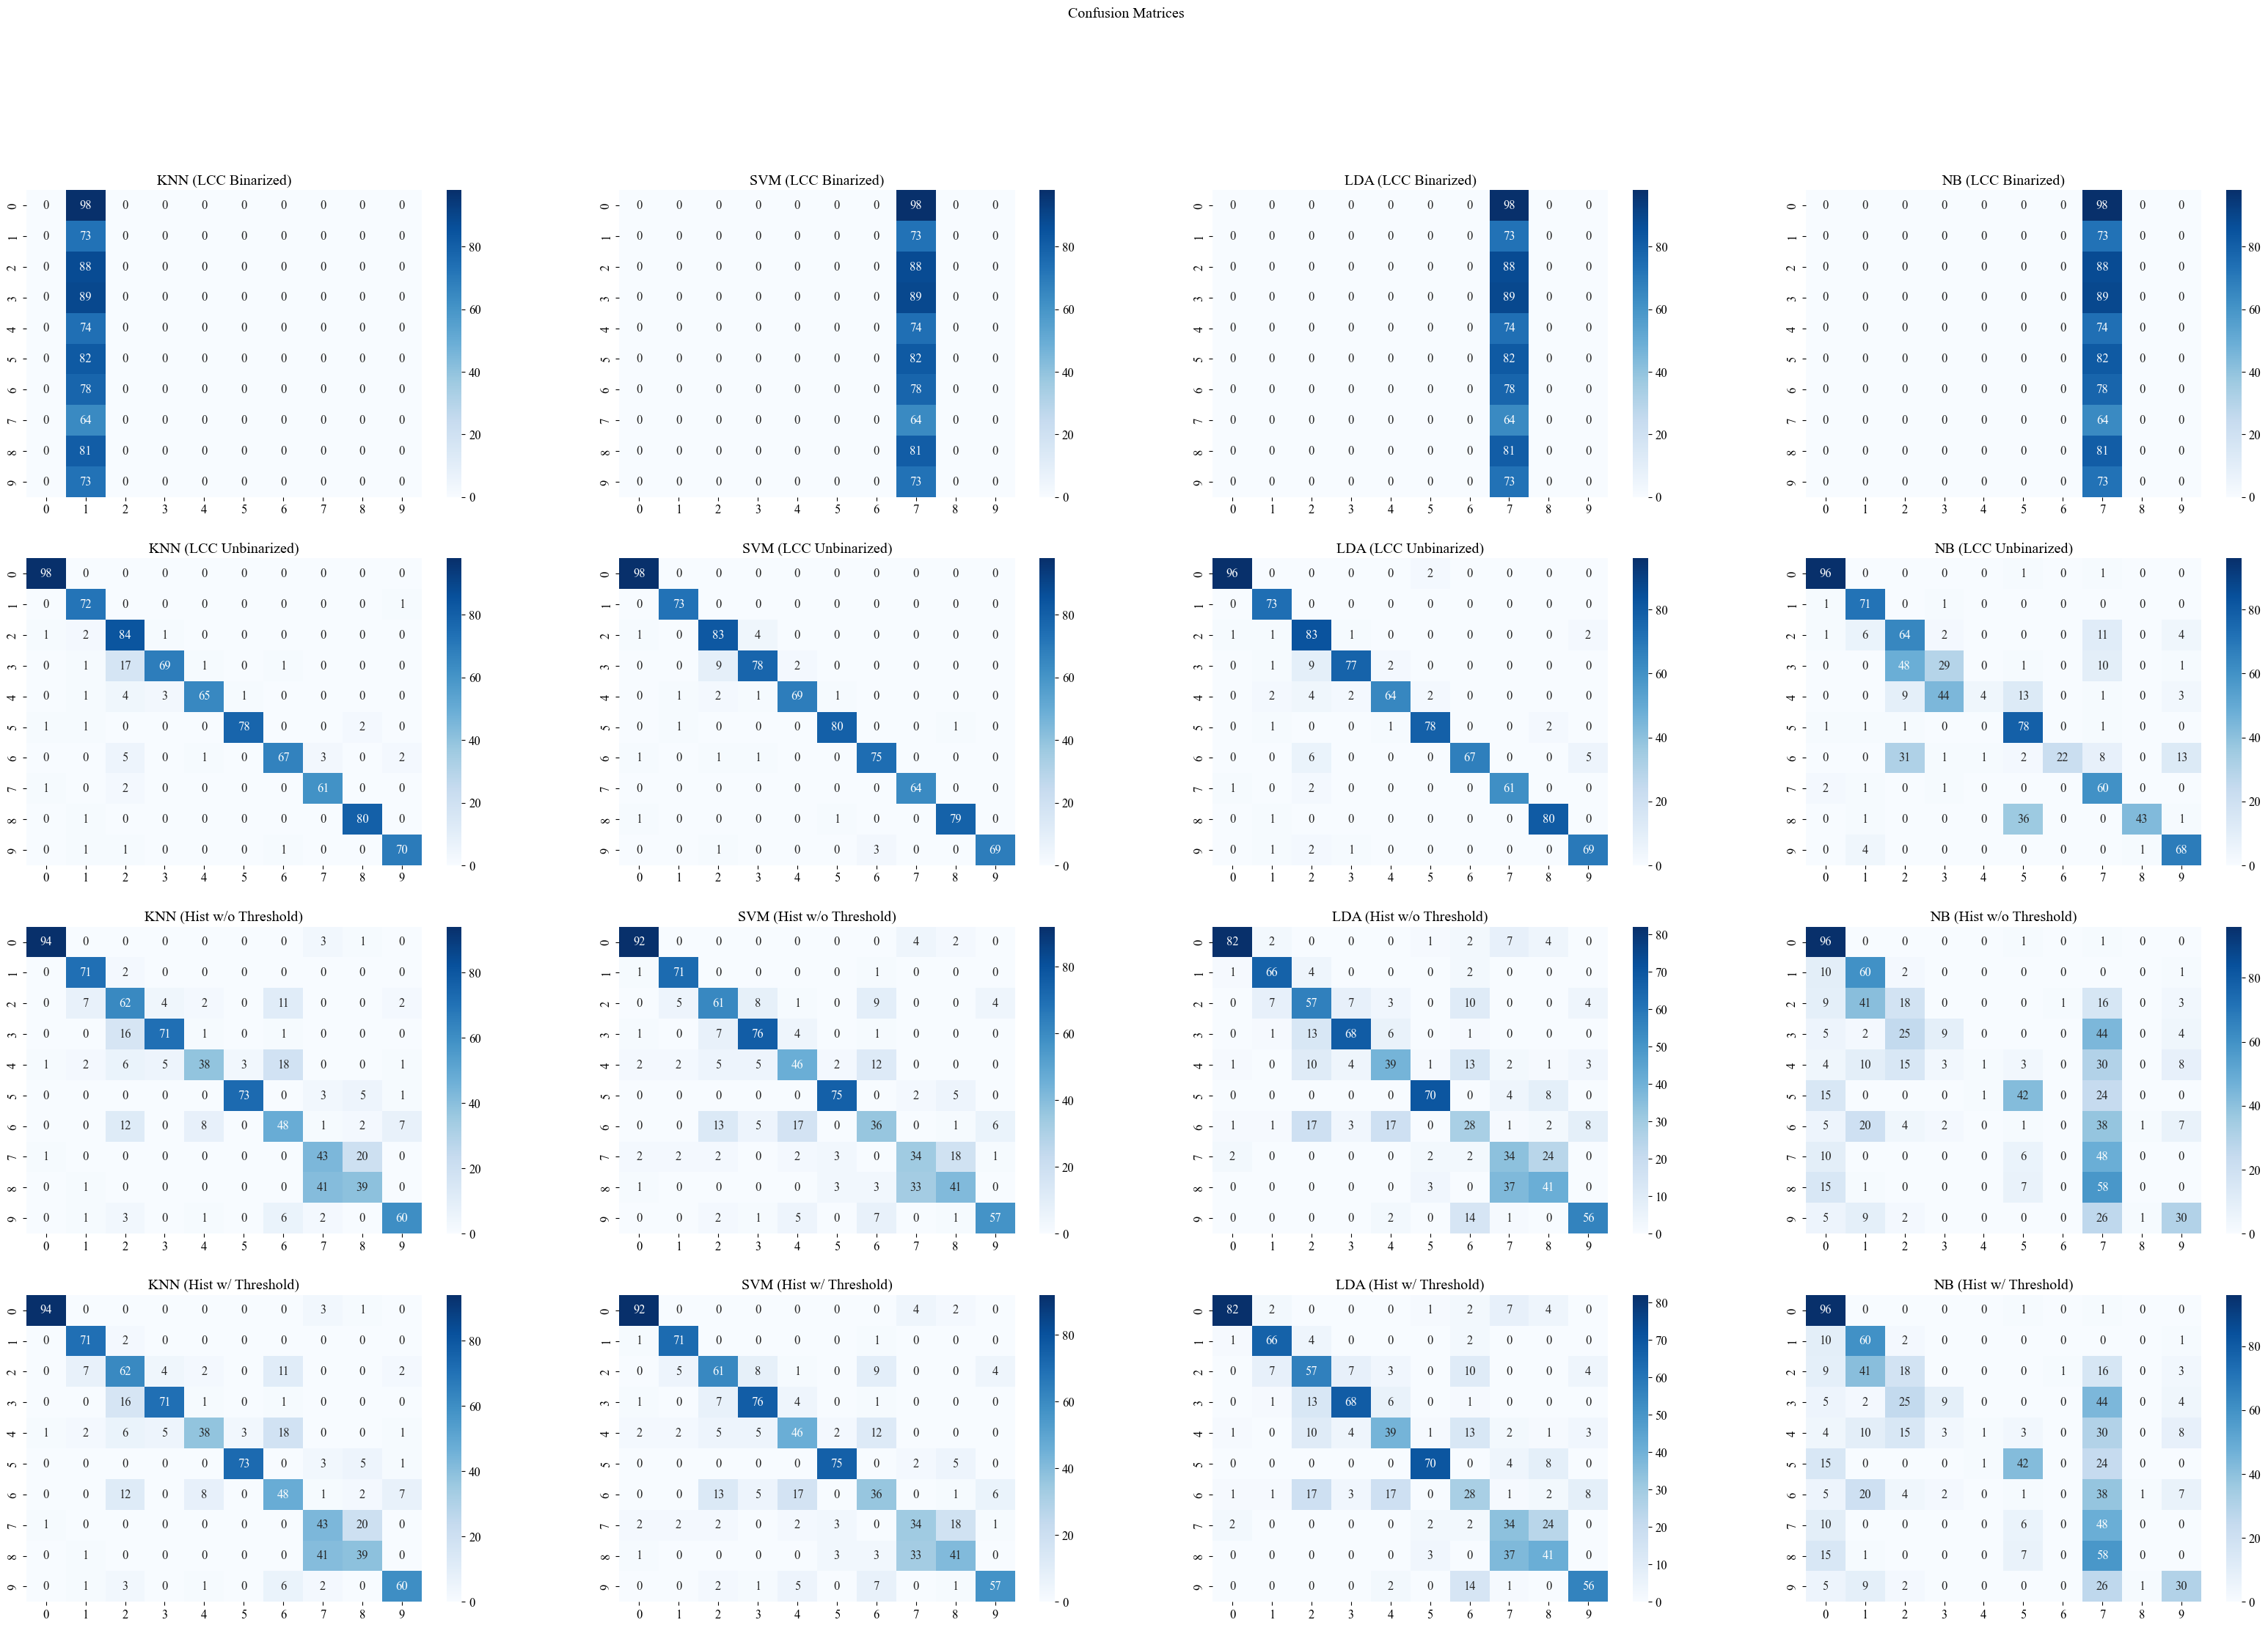

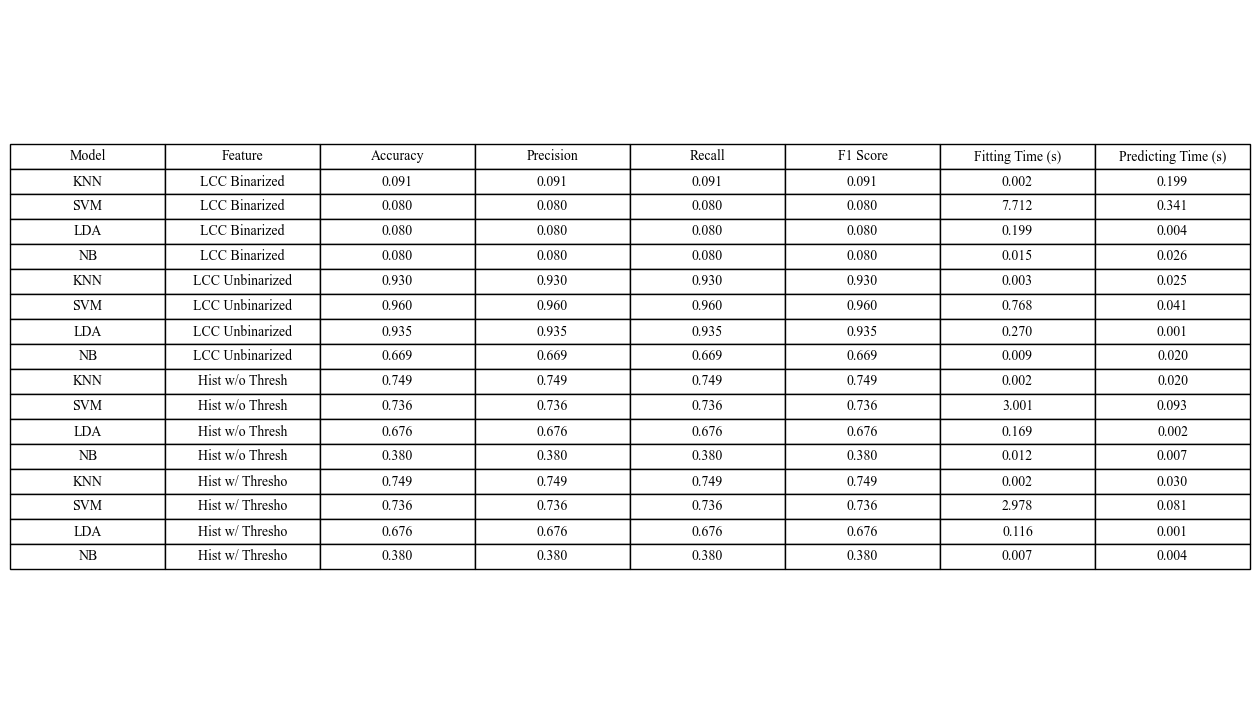

In [24]:

# Define your labels and feature vectors
labels = np.array(labels).ravel()



font_settings = {
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],  # Replace with your preferred serif font
    'font.size': 12
}
plt.rcParams.update(font_settings)

# Define the feature vectors dictionary
feature_vectors = {
    "LCC Binarized": local_chain_code_binarized_features_vector,
    "LCC Unbinarized": local_chain_code_unbinarized_features_vector,
    "Hist w/o Threshold": histogram_feature_vectors_without_threshold,
    "Hist w/ Threshold": histogram_feature_vectors_with_threshold,
}

# Normalize the feature vectors and replace them in the dictionary
for feature_name, feature_vector in feature_vectors.items():
    mean = np.mean(feature_vector, axis=0)
    std_dev = np.std(feature_vector, axis=0)
    normalized_feature_vector = (feature_vector - mean) / (std_dev + 0.001)
    feature_vectors[feature_name] = normalized_feature_vector


# Define models with abbreviated names
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', probability=True),
    "LDA": LinearDiscriminantAnalysis(),
    "NB": GaussianNB()
}

# Create a PDF report to save the plots and table
pdf_pages = PdfPages("report.pdf")

# Initialize the results data
results = []

# Generate ROC curve and AUC plot for individual features and models
roc_data = []

# Collect all accuracies and confusion matrices
all_accuracies = []
all_confusion_matrices = []

for feature_name, feature_vector in feature_vectors.items():
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(feature_vector, selected_labels, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        # Measure fitting time
        start_time = time.time()
        # Fit the model
        model.fit(X_train, y_train)
        fitting_time = time.time() - start_time

        # Get predicted probabilities
        start_time = time.time()
        y_score = model.predict_proba(X_test)
        predicting_time = time.time() - start_time

        # If it's a multiclass problem, compute ROC-AUC for each class
        if len(np.unique(y_train)) > 2:
            fpr, tpr, roc_auc = {}, {}, {}
            for class_num in range(len(model.classes_)):
                fpr[class_num], tpr[class_num], _ = roc_curve(y_test == class_num, y_score[:, class_num])
                roc_auc[class_num] = auc(fpr[class_num], tpr[class_num])

            # Compute macro-average AUC
            macro_auc = np.mean(list(roc_auc.values()))

            # Append ROC curve data
            roc_data.append({
                "Feature": feature_name,
                "Model": model_name,
                "FPR": fpr,
                "TPR": tpr,
                "AUC": roc_auc,
                "Macro AUC": macro_auc,
            })
        else:
            # Compute ROC curve and AUC for binary classification
            fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
            roc_auc = auc(fpr, tpr)
            # Append ROC curve data
            roc_data.append({
                "Feature": feature_name,
                "Model": model_name,
                "FPR": fpr,
                "TPR": tpr,
                "AUC": roc_auc,
            })

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='micro')
        recall = recall_score(y_test, y_pred, average='micro')
        f1 = f1_score(y_test, y_pred, average='micro')
        cm = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)

        # Append the results
        results.append({
            "Feature": feature_name,
            "Model": model_name,
            "AUC": roc_auc,
            "Macro AUC": macro_auc,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Fitting Time (s)": fitting_time,
            "Predicting Time (s)": predicting_time,
            "Confusion Matrix": cm,
            "Classification Report": classification_rep,
        })


# Plot ROC curves for individual features and save to PDF
plt.figure(figsize=(20, 15))
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
for data in roc_data:
    fpr = data["FPR"]
    tpr = data["TPR"]
    model_name = data["Model"]
    feature = data["Feature"]
    auc_dict = data["AUC"]
    auc_value = auc_dict.get(feature)
    if auc_value is not None:
        label = f"{model_name} ({feature}) AUC = {auc_value:.2f}"
        plt.plot(fpr, tpr, lw=2, label=label)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
pdf_pages.savefig()

# Collect all accuracies and confusion matrices
all_accuracies = []
all_confusion_matrices = []

for data in results:
    all_accuracies.append(data["Accuracy"])
    all_confusion_matrices.append(data["Confusion Matrix"])

# Plot accuracy bar chart for all models and features
plt.figure(figsize=(40, 25))
sns.barplot(x=[f"{data['Model']} ({data['Feature']})" for data in results], y=all_accuracies)
plt.title("Accuracy")
plt.ylim([0, 1])
pdf_pages.savefig()

# Plot confusion matrices for all models and features
num_models = len(models)
num_features = len(feature_vectors)
plt.figure(figsize=(40, 25))
for i, data in enumerate(results):
    plt.subplot(num_features, num_models, i + 1)
    sns.heatmap(data["Confusion Matrix"], annot=True, fmt='d', cmap='Blues')
    plt.title(f"{data['Model']} ({data['Feature']})")

plt.suptitle("Confusion Matrices")
pdf_pages.savefig()

# Create a table for the results of individual features
table_data = []
for data in results:
    model_name = data["Model"]
    feature_name = data["Feature"]
    if len(model_name) > 15:
        model_name = model_name[:15]  # Shorten model name if too long
    if len(feature_name) > 15:
        feature_name = feature_name[:15]  # Shorten feature name if too long
    table_data.append([
        model_name,
        feature_name,
        f"{data['Accuracy']:.3f}",
        f"{data['Precision']:.3f}",
        f"{data['Recall']:.3f}",
        f"{data['F1 Score']:.3f}",
        f"{data['Fitting Time (s)']:.3f}",
        f"{data['Predicting Time (s)']:.3f}"
    ])

# Define table headers
table_headers = [
    "Model", "Feature", "Accuracy",
    "Precision", "Recall", "F1 Score", "Fitting Time (s)", "Predicting Time (s)"
]

# Create a table and add it to the PDF report
fig, ax = plt.subplots(figsize=(16, 9))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=table_data, colLabels=table_headers, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
pdf_pages.savefig()

# Close the PDF report
pdf_pages.close()


c:\Users\alija\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alija\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alija\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

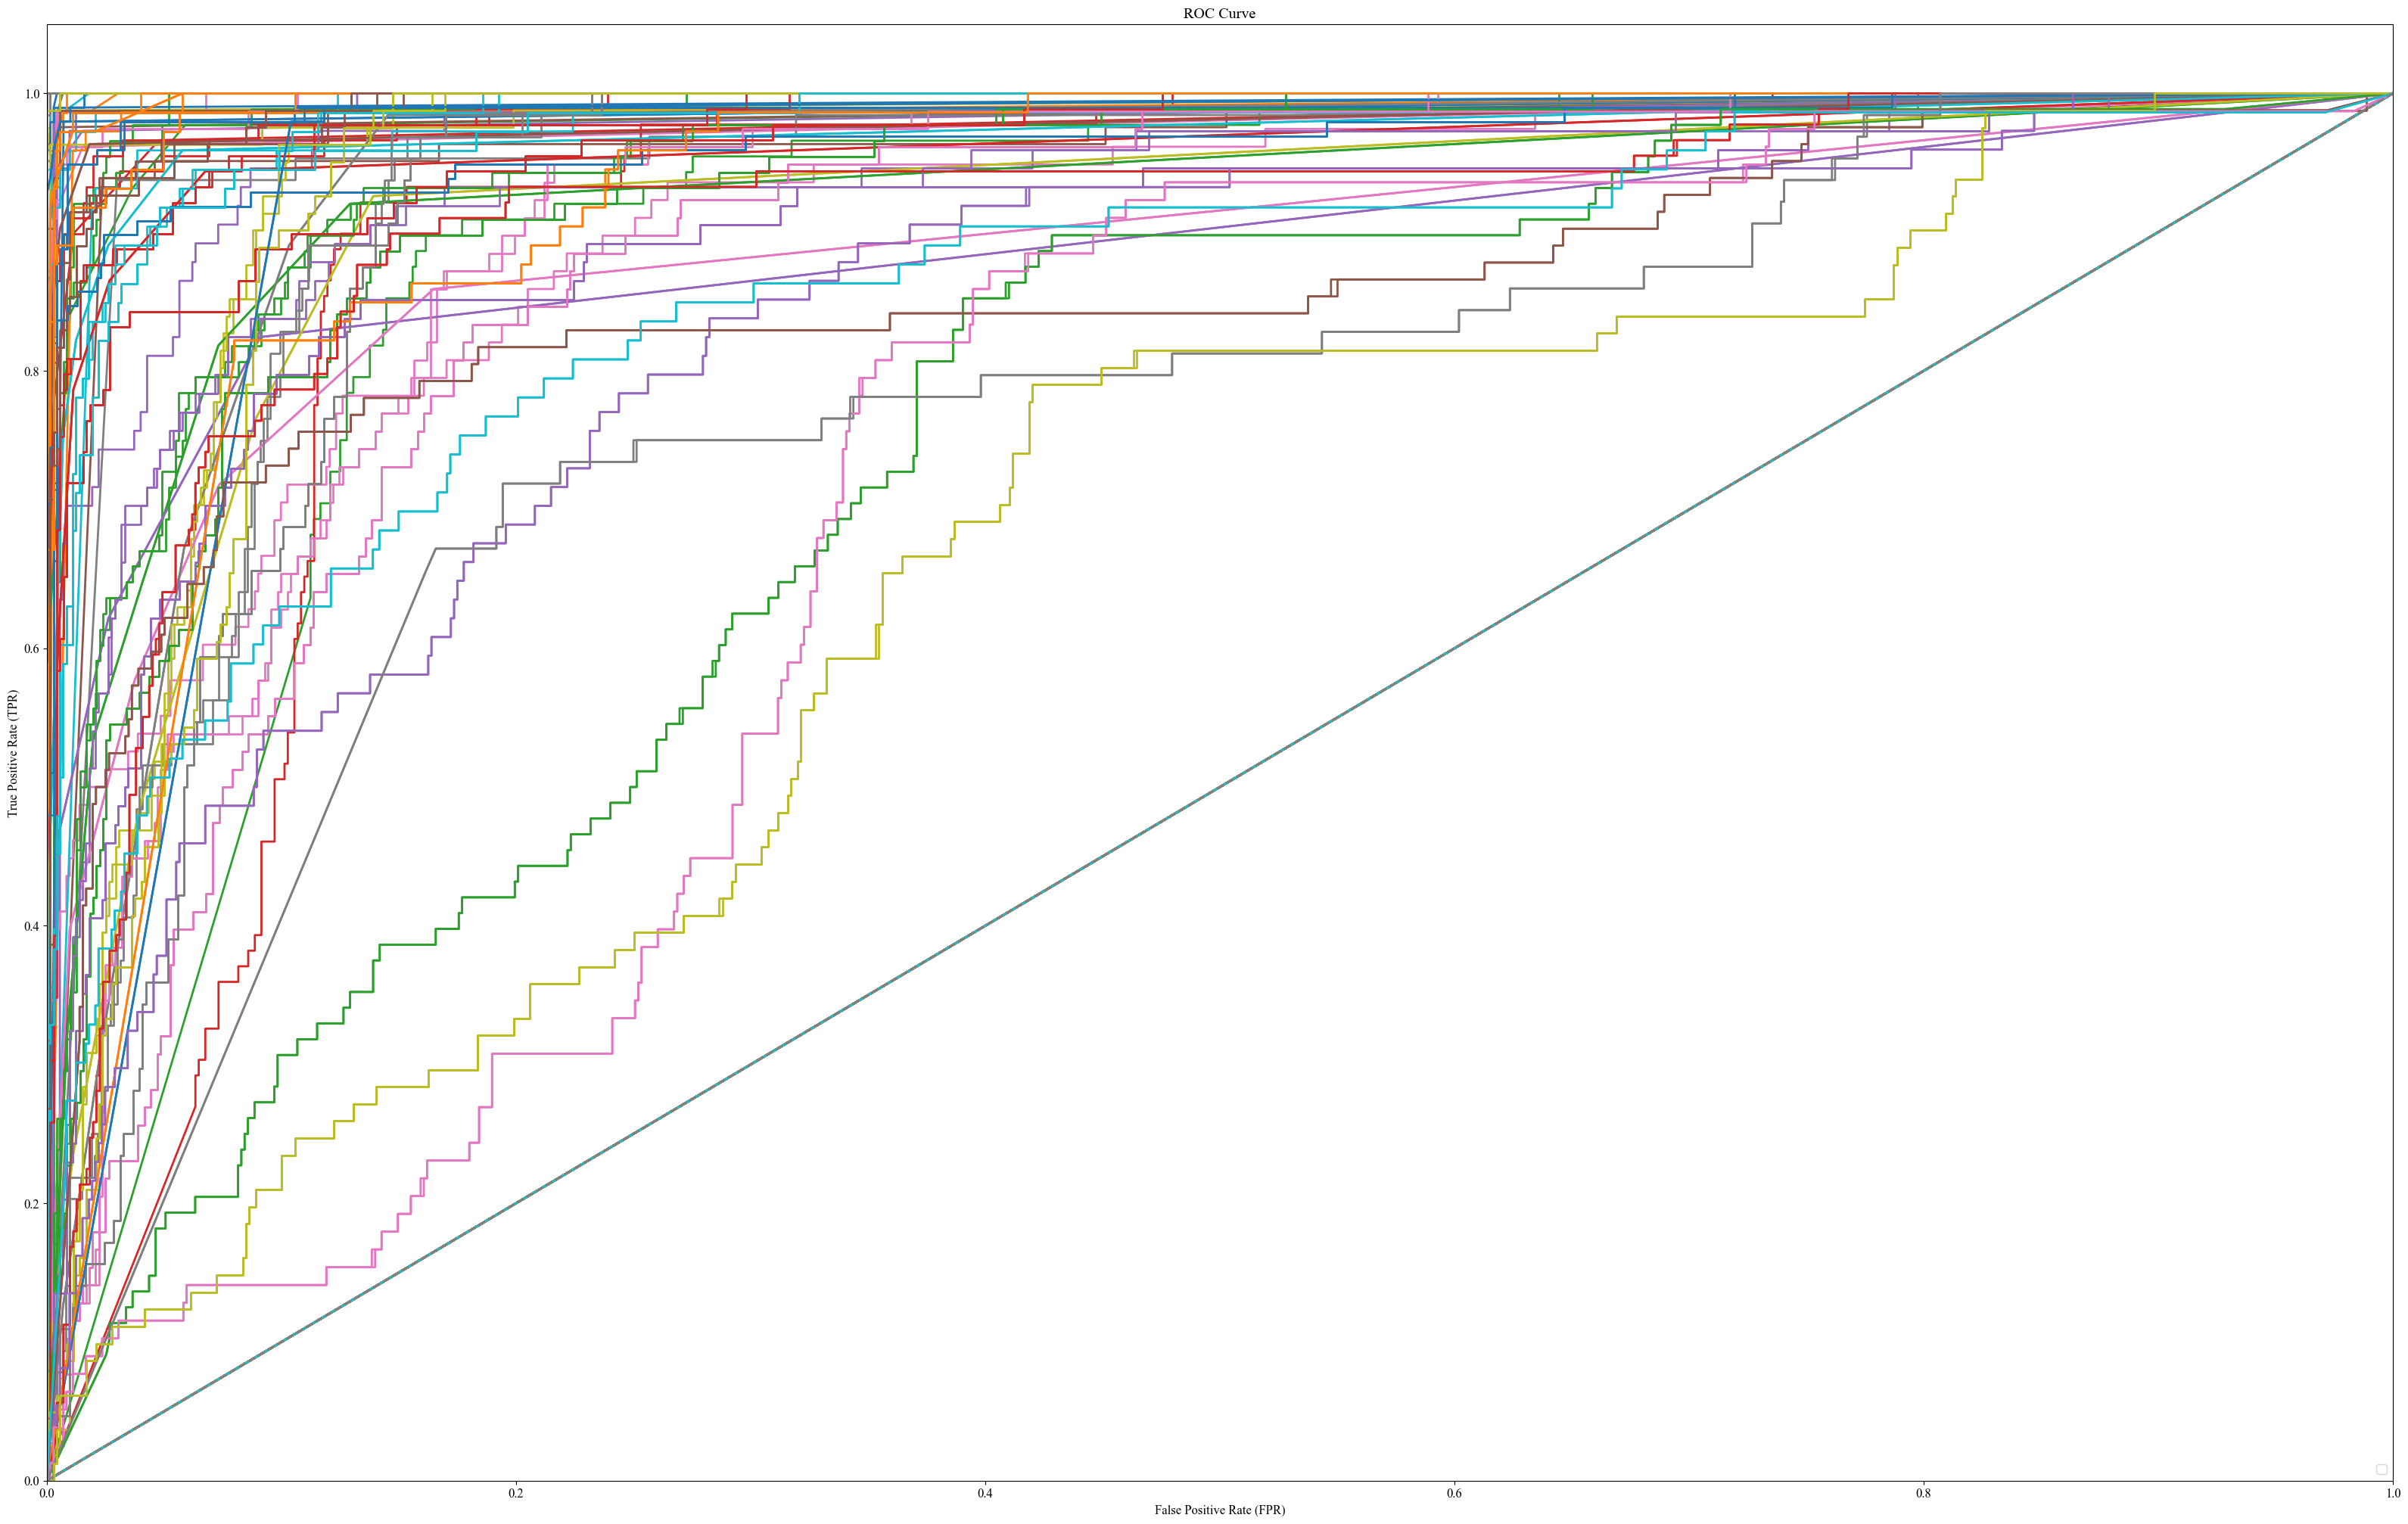

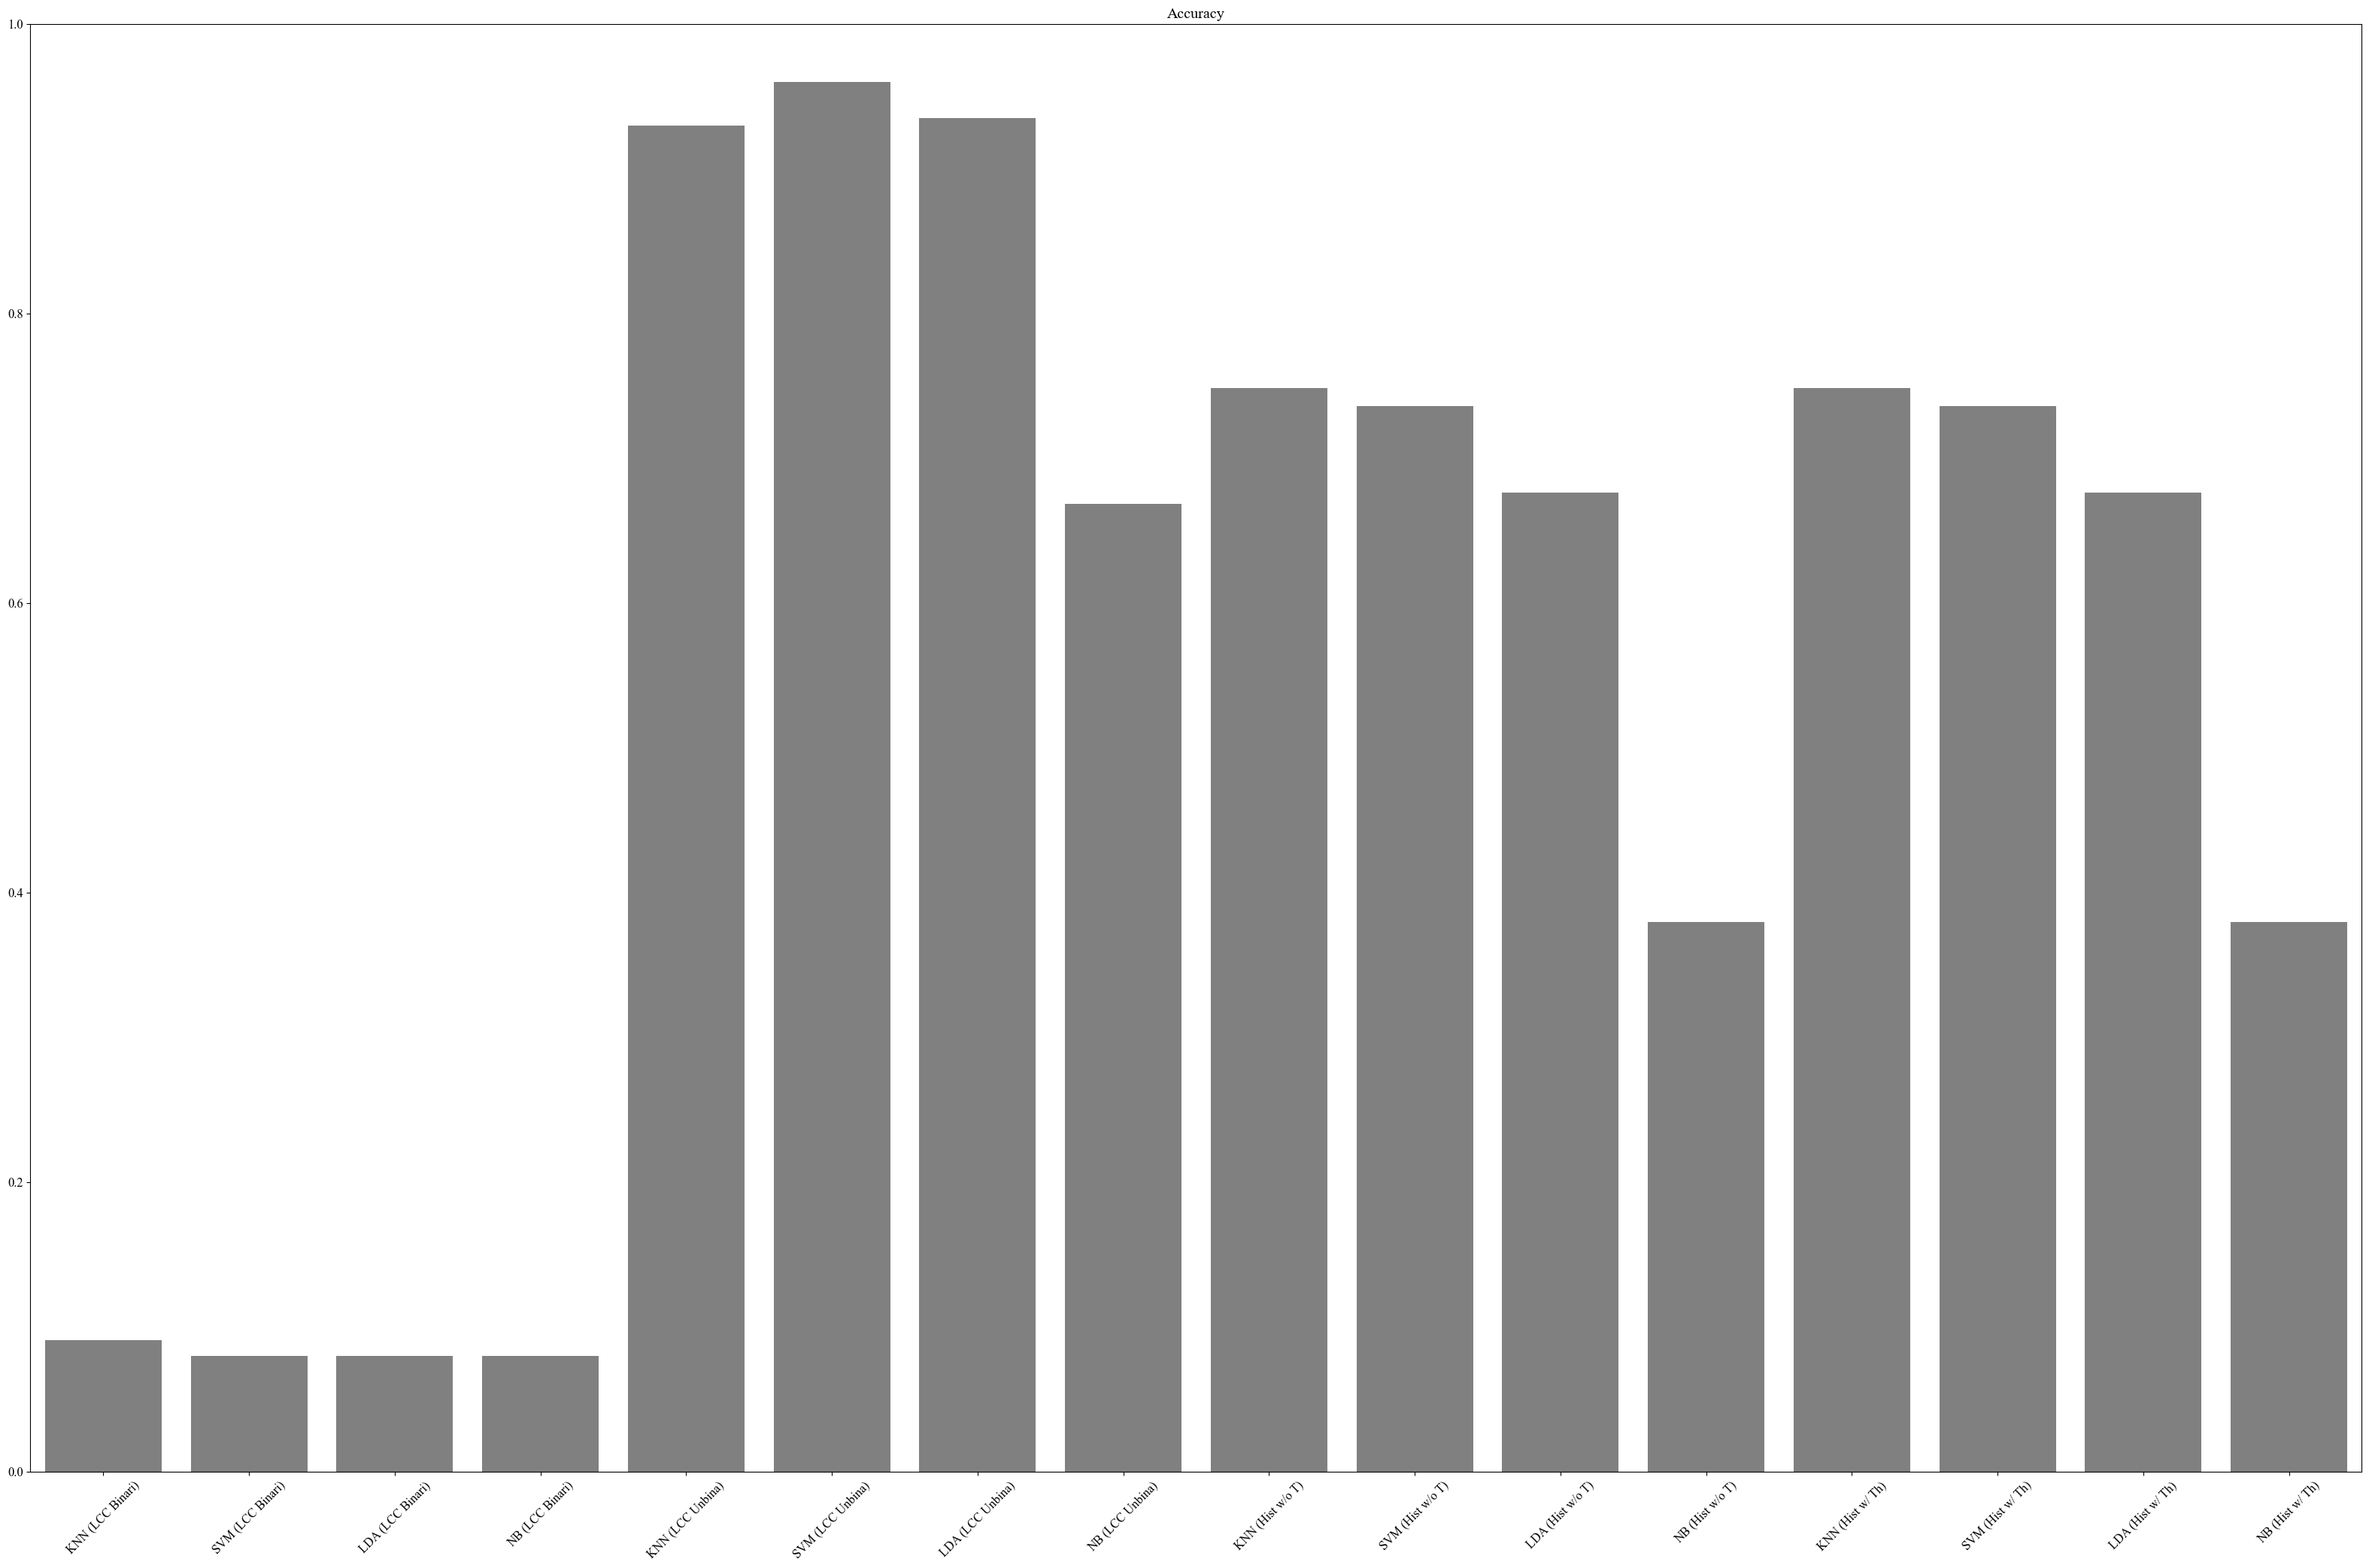

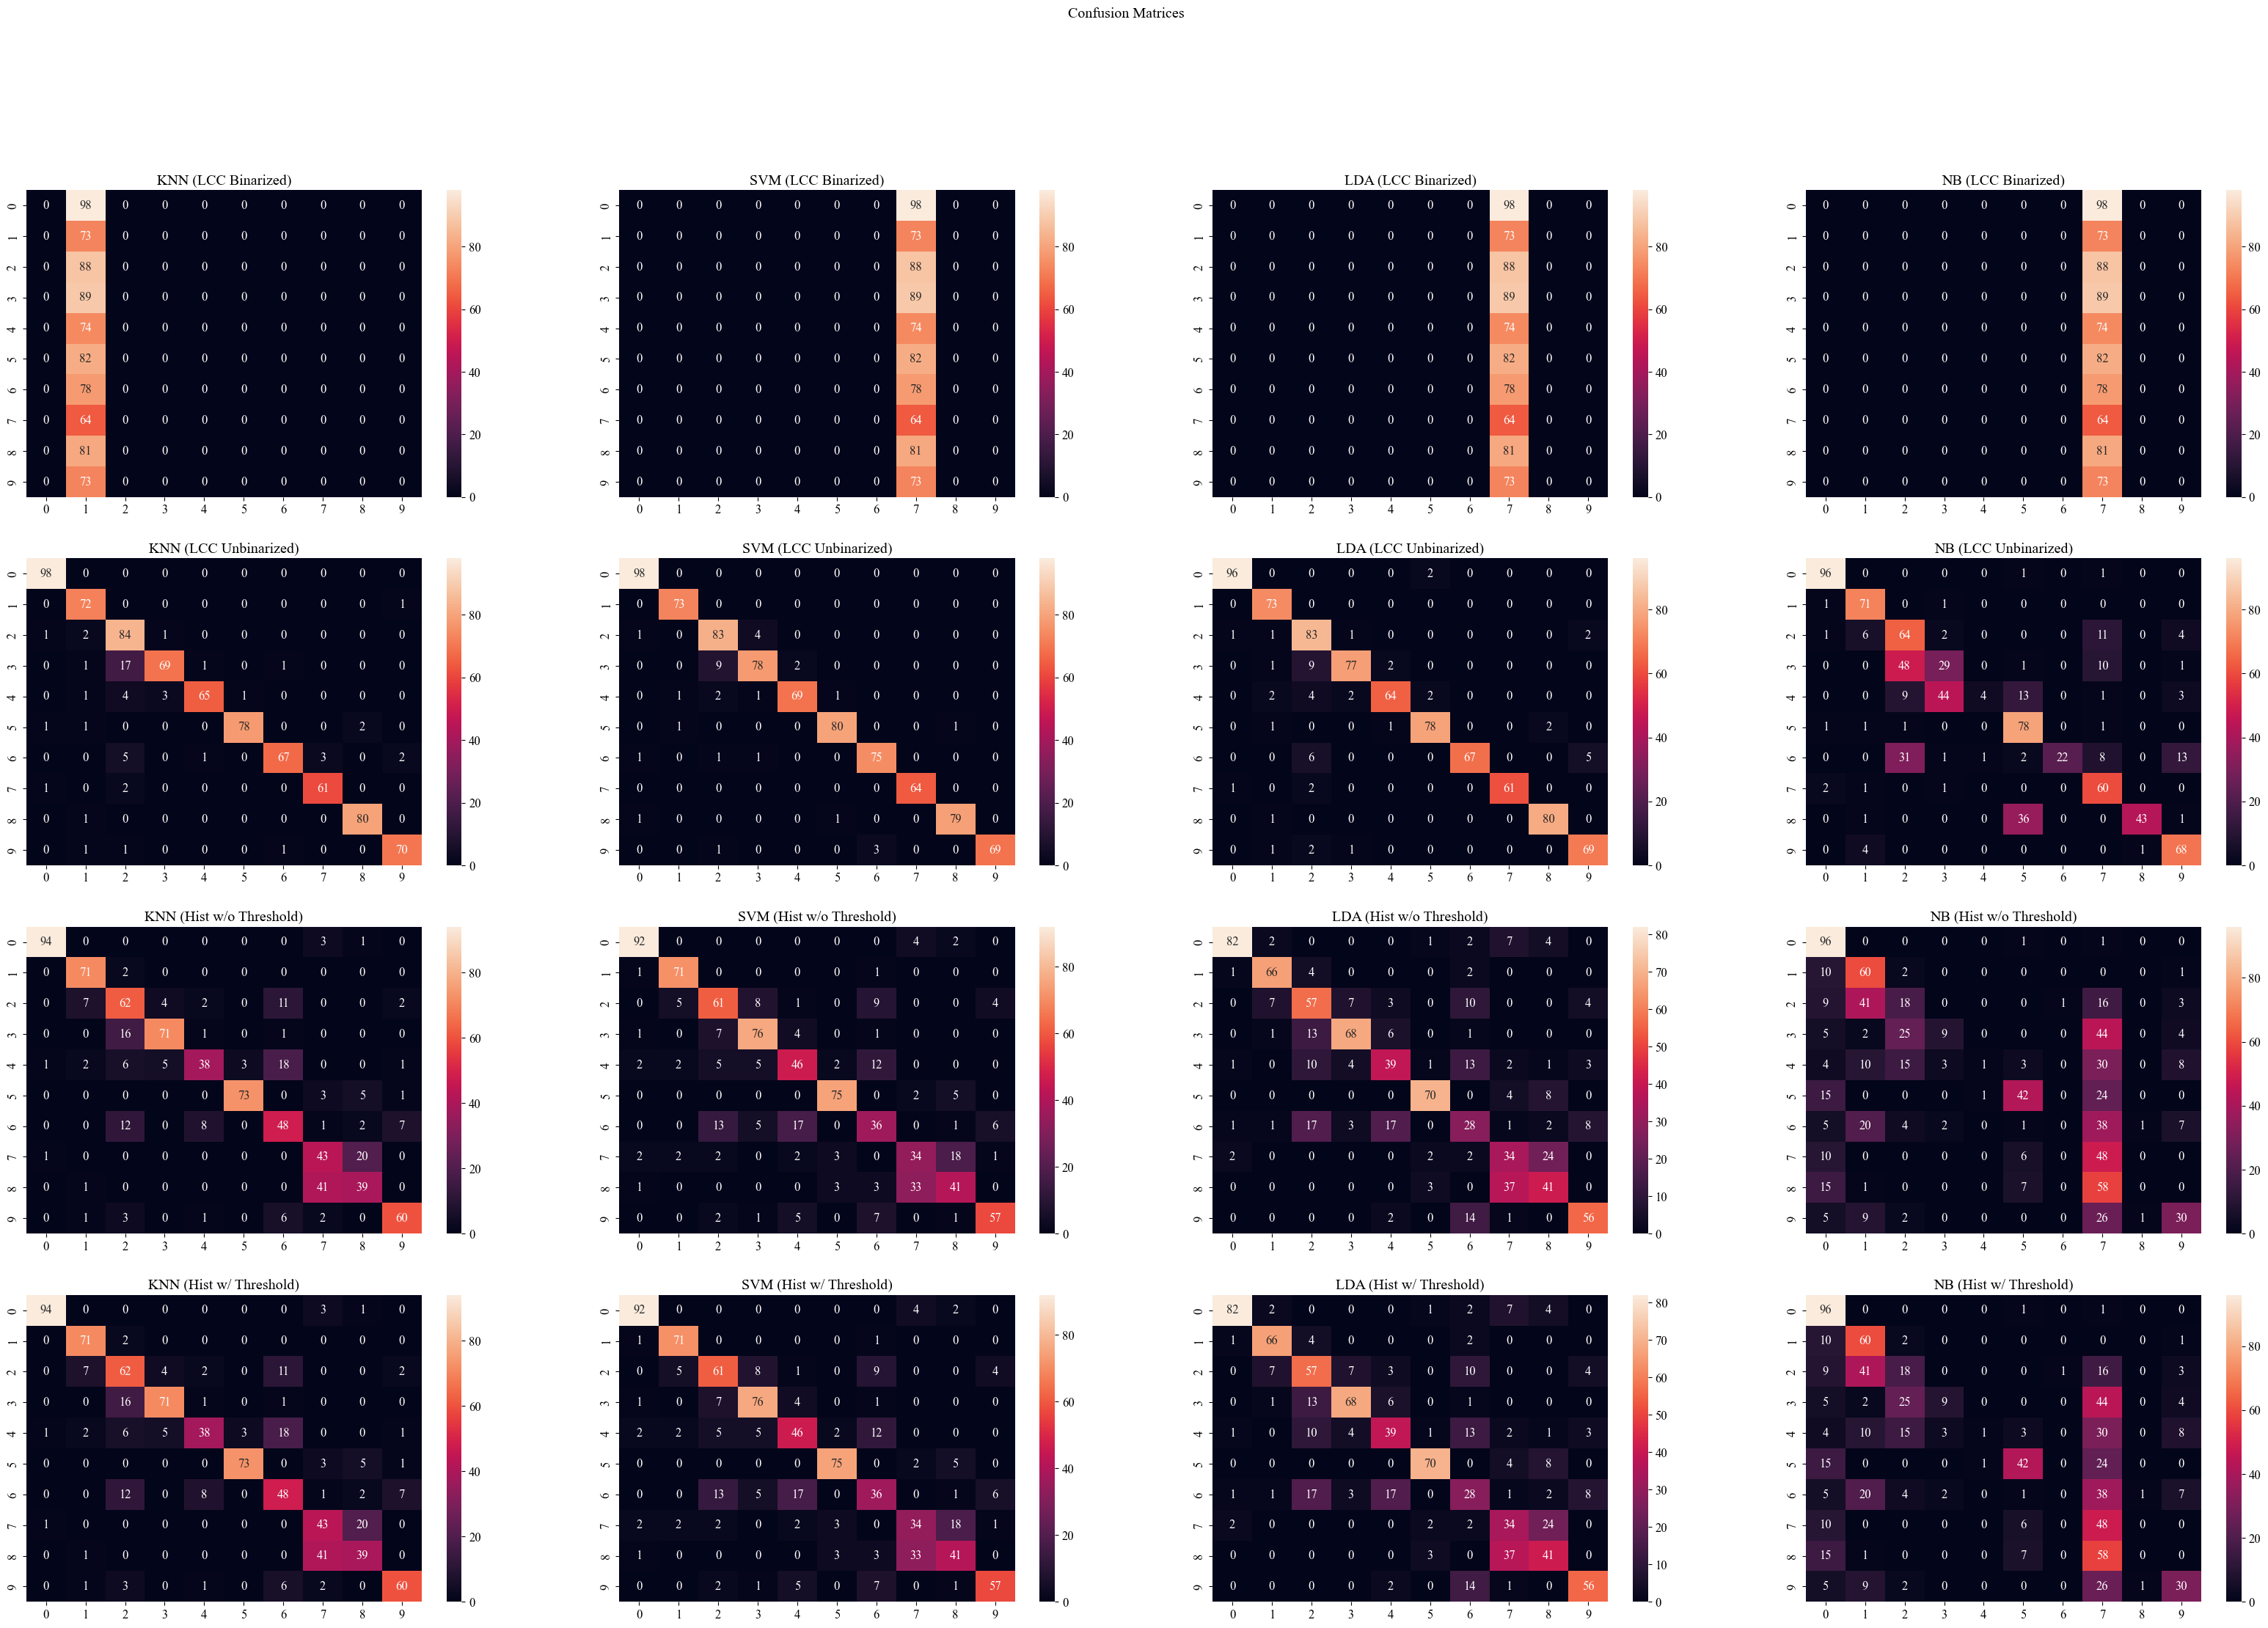

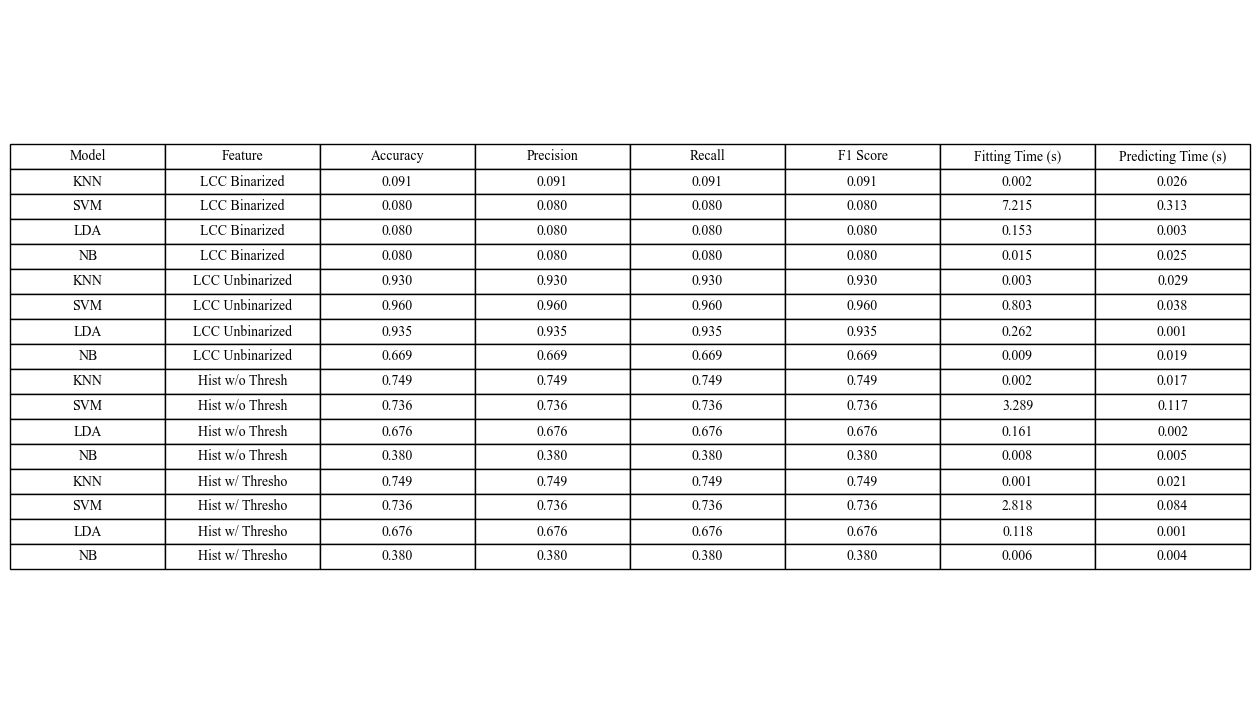

In [25]:

labels = np.array(labels).ravel()

font_settings = {
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],  
    'font.size': 12
}
plt.rcParams.update(font_settings)


# Define the feature vectors dictionary
feature_vectors = {
    "LCC Binarized": local_chain_code_binarized_features_vector,
    "LCC Unbinarized": local_chain_code_unbinarized_features_vector,
    "Hist w/o Threshold": histogram_feature_vectors_without_threshold,
    "Hist w/ Threshold": histogram_feature_vectors_with_threshold,
}

# Normalize the feature vectors and replace them in the dictionary
for feature_name, feature_vector in feature_vectors.items():
    mean = np.mean(feature_vector, axis=0)
    std_dev = np.std(feature_vector, axis=0)
    normalized_feature_vector = (feature_vector - mean) / (std_dev + 0.001)
    feature_vectors[feature_name] = normalized_feature_vector

# Define models with abbreviated names
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', probability=True),
    "LDA": LinearDiscriminantAnalysis(),
    "NB": GaussianNB()
}

pdf_pages = PdfPages("report.pdf")

results = []

roc_data = []

all_accuracies = []
all_confusion_matrices = []

for feature_name, feature_vector in feature_vectors.items():
    X_train, X_test, y_train, y_test = train_test_split(feature_vector, selected_labels, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        # Measure fitting time
        start_time = time.time()
        # Fit the model
        model.fit(X_train, y_train)
        fitting_time = time.time() - start_time

        # Get predicted probabilities
        start_time = time.time()
        y_score = model.predict_proba(X_test)
        predicting_time = time.time() - start_time

        # If it's a multiclass problem, compute ROC-AUC for each class
        if len(np.unique(y_train)) > 2:
            fpr, tpr, roc_auc = {}, {}, {}
            for class_num in range(len(model.classes_)):
                fpr[class_num], tpr[class_num], _ = roc_curve(y_test == class_num, y_score[:, class_num])
                roc_auc[class_num] = auc(fpr[class_num], tpr[class_num])

            # Compute macro-average AUC
            macro_auc = np.mean(list(roc_auc.values()))

            # Append ROC curve data
            roc_data.append({
                "Feature": feature_name,
                "Model": model_name,
                "FPR": fpr,
                "TPR": tpr,
                "AUC": roc_auc,
                "Macro AUC": macro_auc,
            })
        else:
            # Compute ROC curve and AUC for binary classification
            fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
            roc_auc = auc(fpr, tpr)
            # Append ROC curve data
            roc_data.append({
                "Feature": feature_name,
                "Model": model_name,
                "FPR": fpr,
                "TPR": tpr,
                "AUC": roc_auc,
            })

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='micro')
        recall = recall_score(y_test, y_pred, average='micro')
        f1 = f1_score(y_test, y_pred, average='micro')
        cm = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)

        # Append the results
        results.append({
            "Feature": feature_name,
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Fitting Time (s)": fitting_time,
            "Predicting Time (s)": predicting_time,
            "Confusion Matrix": cm,
            "Classification Report": classification_rep,
        })


plt.figure(figsize=(40, 25))
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
for data in roc_data:
    fpr = data["FPR"]
    tpr = data["TPR"]
    model_name = data["Model"]
    feature = data["Feature"]
    auc_value = data["AUC"]
    label = f"{model_name} ({feature})"
    for class_num in range(len(model.classes_)):
        plt.plot(fpr[class_num], tpr[class_num], lw=2)

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.savefig("roc_curve.png", dpi=300)  

# Collect all accuracies and confusion matrices
all_accuracies = []
all_confusion_matrices = []

# Modify the code for plotting accuracy bar chart
model_feature_names = [f"{data['Model'][:10]} ({data['Feature'][:10]})" for data in results]
accuracy_values = [data['Accuracy'] for data in results]

plt.figure(figsize=(40, 25))
sns.barplot(x=model_feature_names, y=accuracy_values, color="gray")
plt.title("Accuracy")
plt.ylim([0, 1])
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.savefig("accuracy_bar_chart.png", dpi=300)


# Plot confusion matrices for all models and features in grayscale
num_models = len(models)
num_features = len(feature_vectors)
plt.figure(figsize=(40, 25))
for i, data in enumerate(results):
    plt.subplot(num_features, num_models, i + 1)
    sns.heatmap(data["Confusion Matrix"], annot=True, fmt='d')
    plt.title(f"{data['Model']} ({data['Feature']})")

plt.suptitle("Confusion Matrices")
plt.savefig("confusion_matrices.png", dpi=300) 

table_data = []
for data in results:
    model_name = data["Model"]
    feature_name = data["Feature"]
    if len(model_name) > 15:
        model_name = model_name[:15] 
    if len(feature_name) > 15:
        feature_name = feature_name[:15]  
    table_data.append([
        model_name,
        feature_name,
        f"{data['Accuracy']:.3f}",
        f"{data['Precision']:.3f}",
        f"{data['Recall']:.3f}",
        f"{data['F1 Score']:.3f}",
        f"{data['Fitting Time (s)']:.3f}",
        f"{data['Predicting Time (s)']:.3f}"
    ])

fig, ax = plt.subplots(figsize=(16, 9))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=table_data, colLabels=table_headers, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.savefig("results_table.png", dpi=300)  

pdf_pages.close()


AttributeError: 'NoneType' object has no attribute 'finalize'

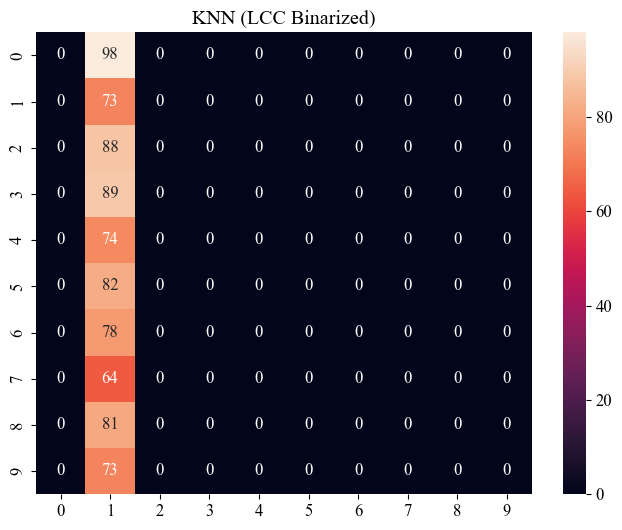

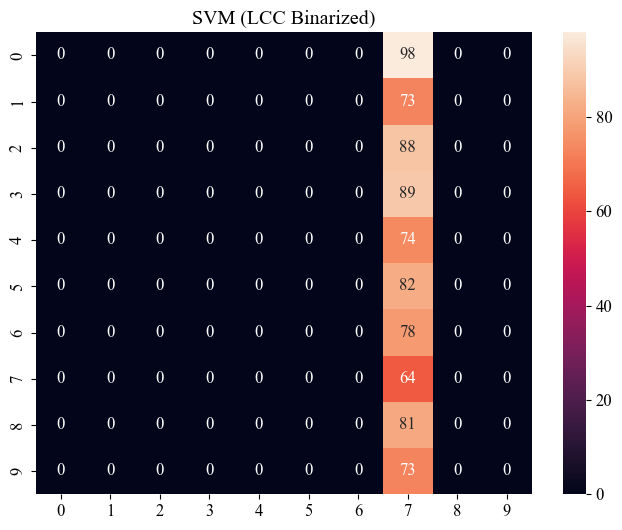

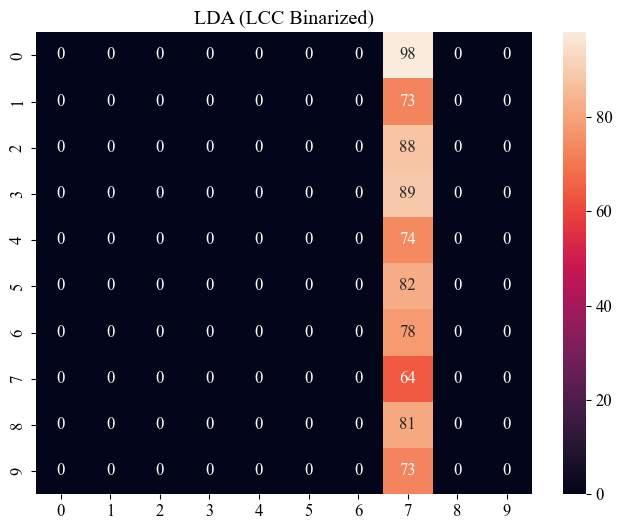

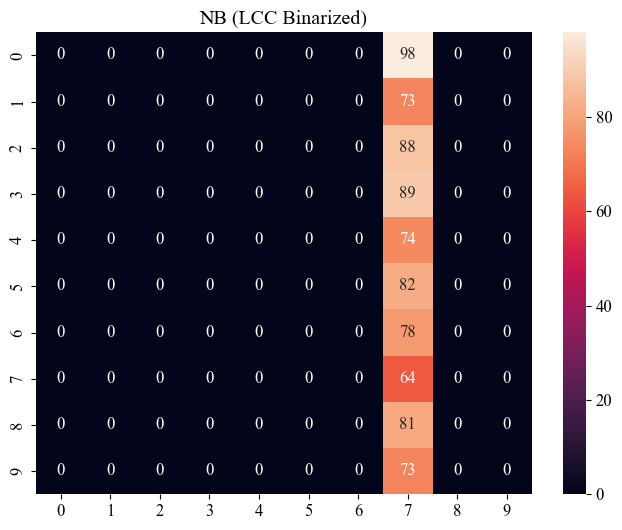

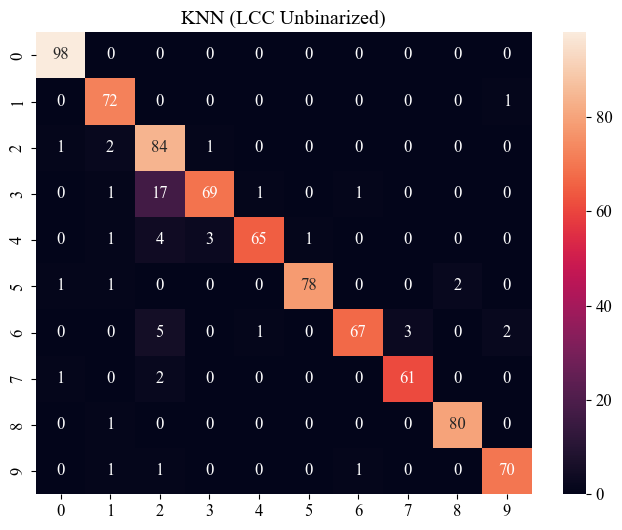

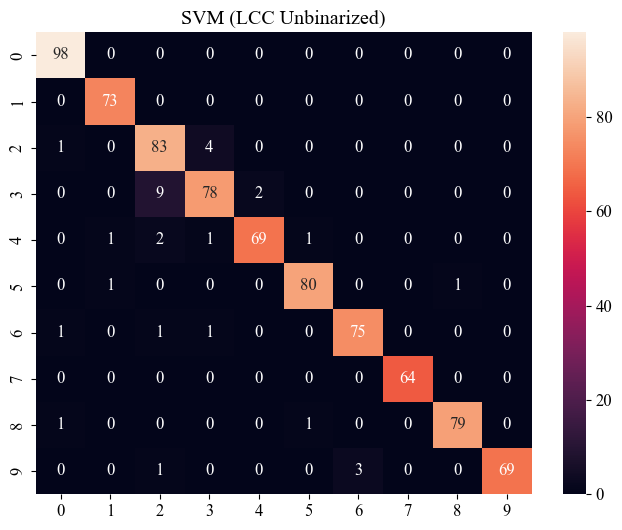

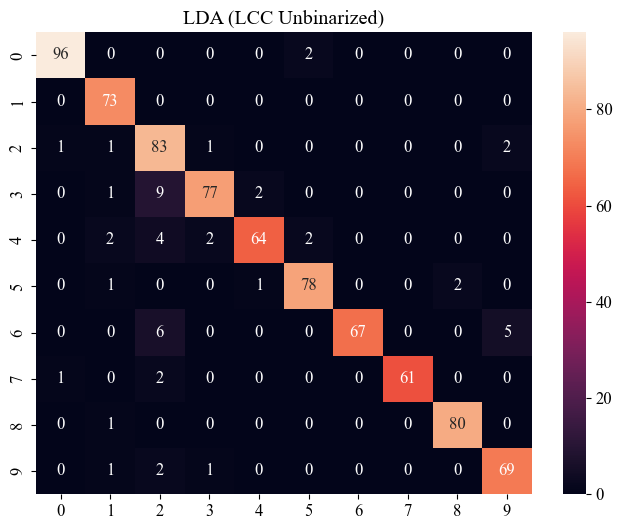

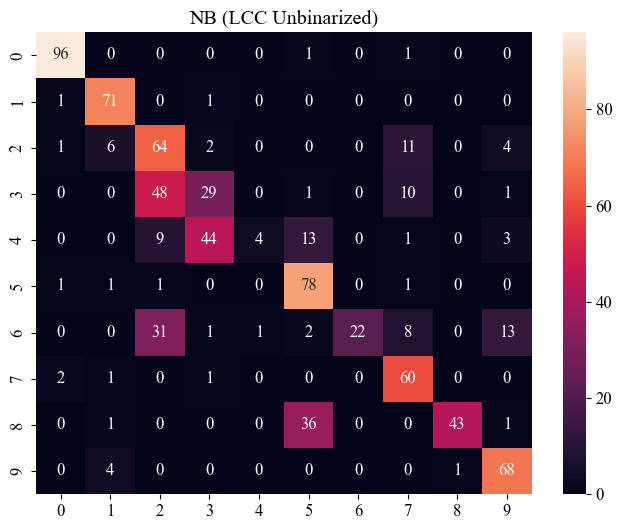

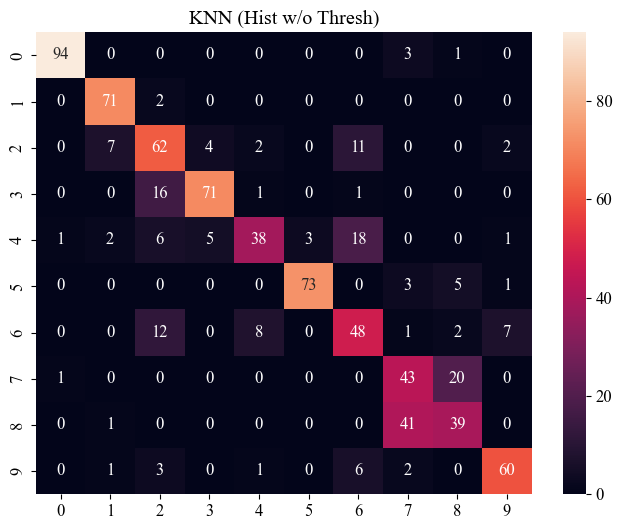

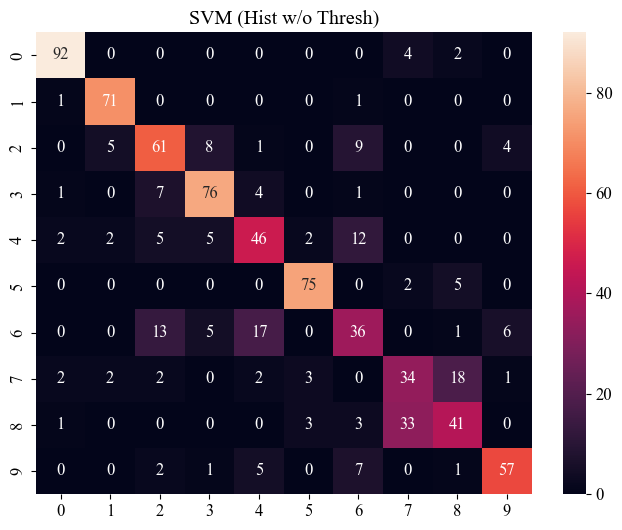

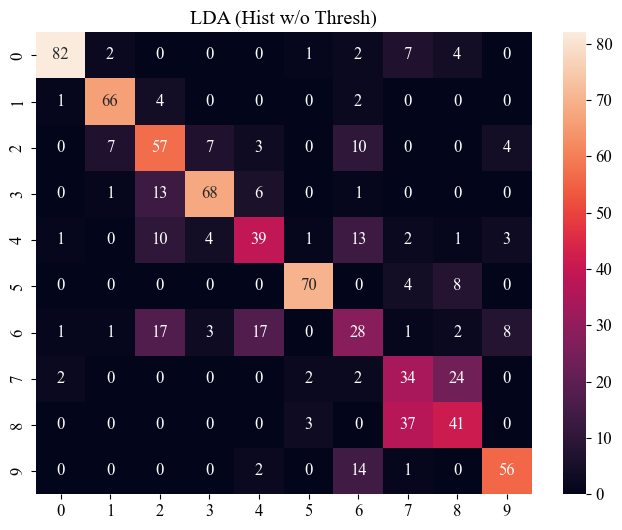

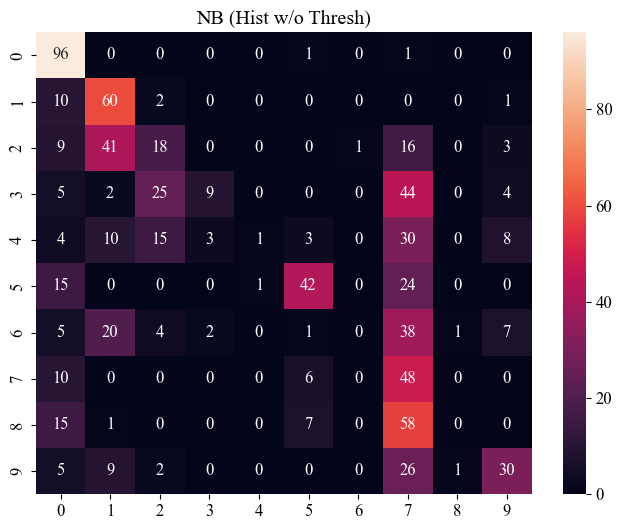

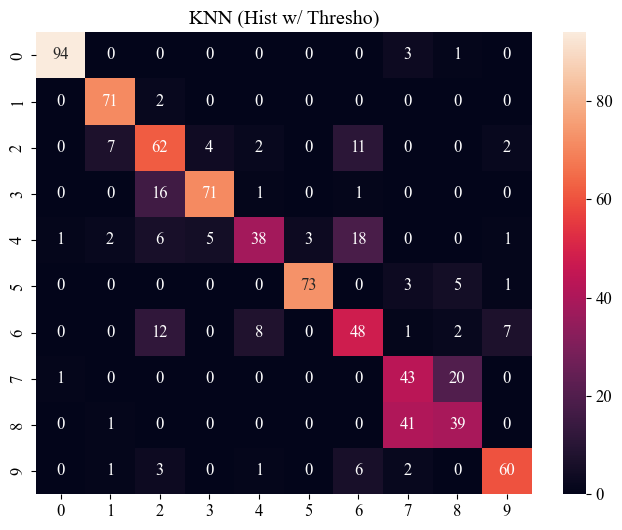

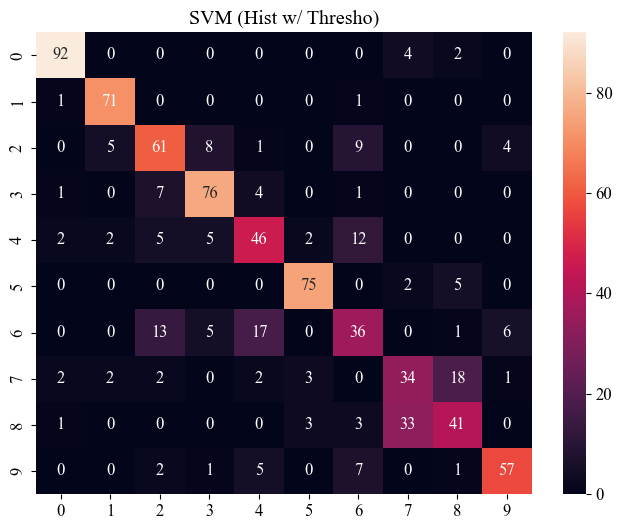

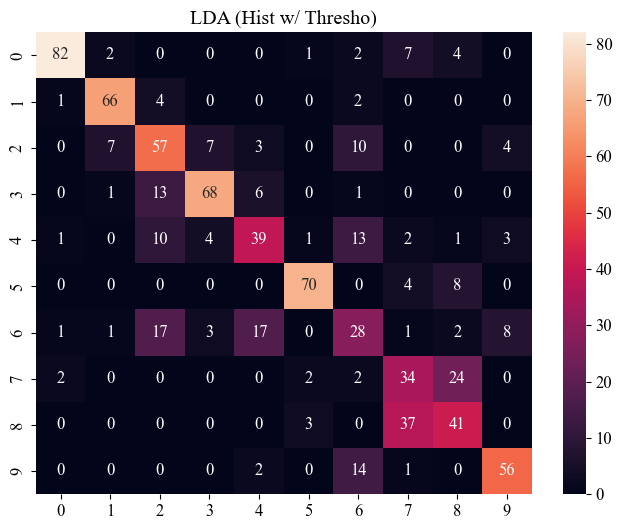

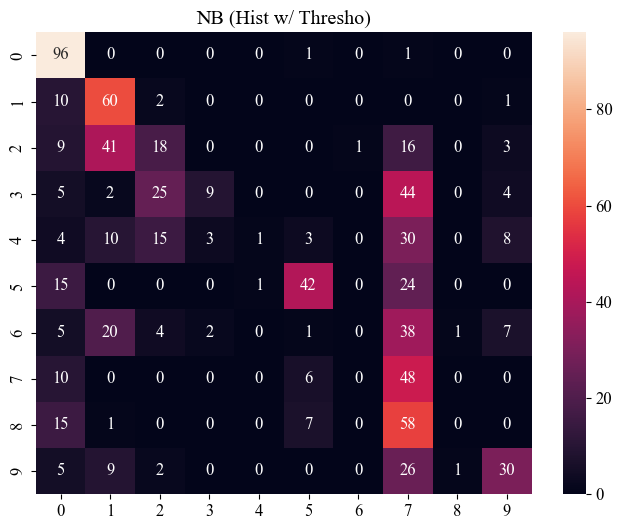

In [26]:


save_dir = "C:/Users/alija/Desktop/confusion_matrices" 

os.makedirs(save_dir, exist_ok=True)

for i, data in enumerate(results):
    model_name = data["Model"]
    feature_name = data["Feature"]
    if len(model_name) > 15:
        model_name = model_name[:15]  
    if len(feature_name) > 15:
        feature_name = feature_name[:15]  
    title = f"{model_name} ({feature_name})"
    filename = os.path.join(save_dir, f"{i + 1}_confusion_matrix.png")

    plt.figure(figsize=(8, 6))
    sns.heatmap(data["Confusion Matrix"], annot=True, fmt='d')
    plt.title(title)
    plt.savefig(filename, dpi=300)

pdf_pages.close()


# Extra 

##  PCA and MI Feature Selection!


In [27]:
from sklearn.decomposition import PCA
num_samples, image_height, image_width = padded_images.shape
reshaped_images = padded_images.reshape(num_samples, -1)
n_components = 100  
pca = PCA(n_components=n_components)
feature_matrix = pca.fit_transform(reshaped_images)
explained_variance = pca.explained_variance_ratio_


In [28]:
explained_variance

array([0.08903215, 0.08067883, 0.05396856, 0.04797408, 0.04377289,
       0.03487811, 0.02704466, 0.02432771, 0.02112074, 0.02013458,
       0.01804542, 0.01649494, 0.01542683, 0.01523298, 0.01344979,
       0.01226086, 0.01186811, 0.01147968, 0.01058318, 0.01019821,
       0.00959299, 0.00913549, 0.00839583, 0.00829518, 0.00711951,
       0.00698959, 0.00662181, 0.00649658, 0.00615592, 0.00590445,
       0.00573392, 0.00545512, 0.00526801, 0.00495206, 0.00470459,
       0.00453246, 0.00448921, 0.00436706, 0.00403077, 0.00385927,
       0.00377802, 0.00373912, 0.00356918, 0.00346898, 0.0033595 ,
       0.00320046, 0.00302527, 0.0029611 , 0.00287367, 0.00280422,
       0.00271365, 0.00265019, 0.00252887, 0.0025152 , 0.00241277,
       0.00238653, 0.0023784 , 0.00227736, 0.00219924, 0.00215618,
       0.00206513, 0.00203093, 0.00199663, 0.00192347, 0.0018805 ,
       0.00184574, 0.0017876 , 0.00172833, 0.00170232, 0.00166238,
       0.00160192, 0.00157048, 0.00155286, 0.00154185, 0.00150

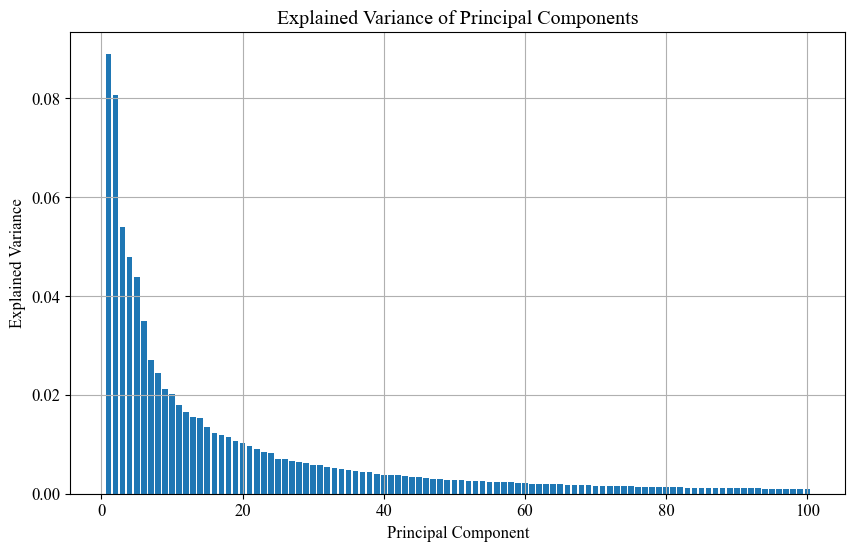

In [29]:
explained_variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance of Principal Components')
plt.grid(True)
plt.show()




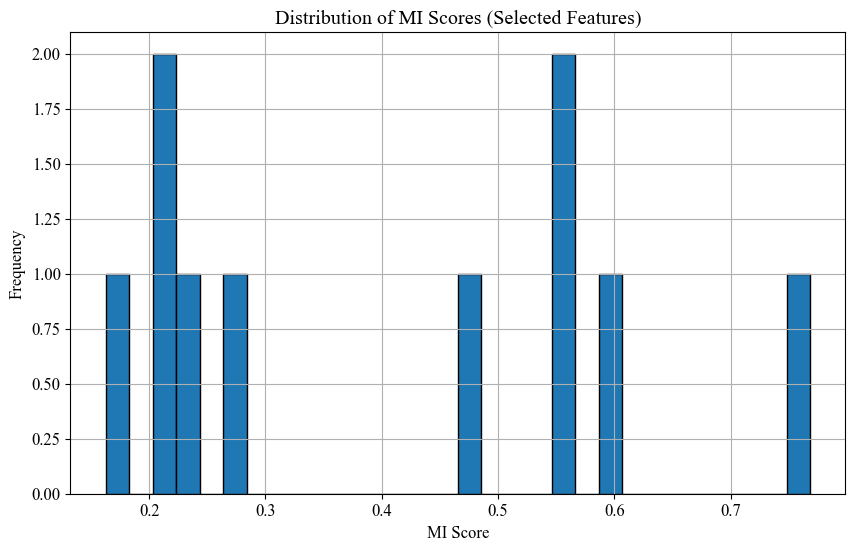

In [30]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
num_features_to_select = 10

mi_selector = SelectKBest(mutual_info_classif, k=num_features_to_select)
X_new = mi_selector.fit_transform(feature_matrix, labels)
selected_feature_indices = mi_selector.get_support(indices=True)
selected_feature_scores = mi_selector.scores_
selected_feature_indices = mi_selector.get_support(indices=True)
selected_feature_scores = mi_selector.scores_
sorted_indices = np.argsort(-selected_feature_scores)  # Sort in descending order
top_k_feature_indices = sorted_indices[:num_features_to_select]



mi_scores_selected = mutual_info_classif(X_new, labels)
plt.figure(figsize=(10, 6))
plt.hist(mi_scores_selected, bins=30, edgecolor='k')
plt.title('Distribution of MI Scores (Selected Features)')
plt.xlabel('MI Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



([<matplotlib.axis.XTick at 0x2443da00e80>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

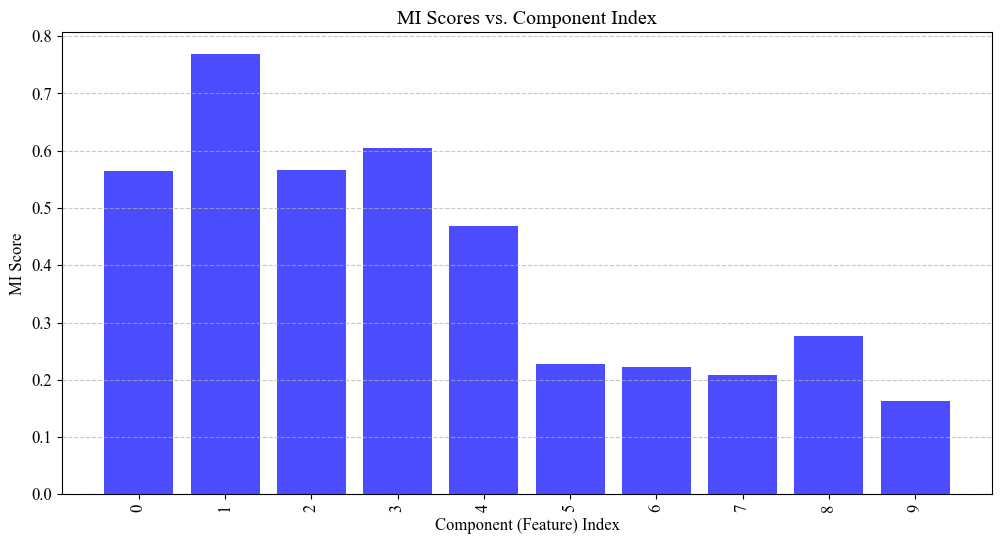

In [31]:

component_indices = np.arange(len(mi_scores_selected))

plt.figure(figsize=(12, 6))
plt.bar(component_indices, mi_scores_selected, color='b', alpha=0.7, align='center')
plt.title('MI Scores vs. Component Index')
plt.xlabel('Component (Feature) Index')
plt.ylabel('MI Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(component_indices, rotation=90)  


In [33]:

num_components_list = [10, 20, 40, 50, 80]


num_samples, image_height, image_width = selected_padded_images.shape
all_results = {}
# Select the best components based on MI scores
mi_selector = SelectKBest(score_func=mutual_info_classif, k=10)
selected_features = mi_selector.fit_transform(selected_padded_images.reshape(num_samples,-1), selected_labels)
np.shape (selected_features)

(4000, 10)

c:\Users\alija\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alija\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alija\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

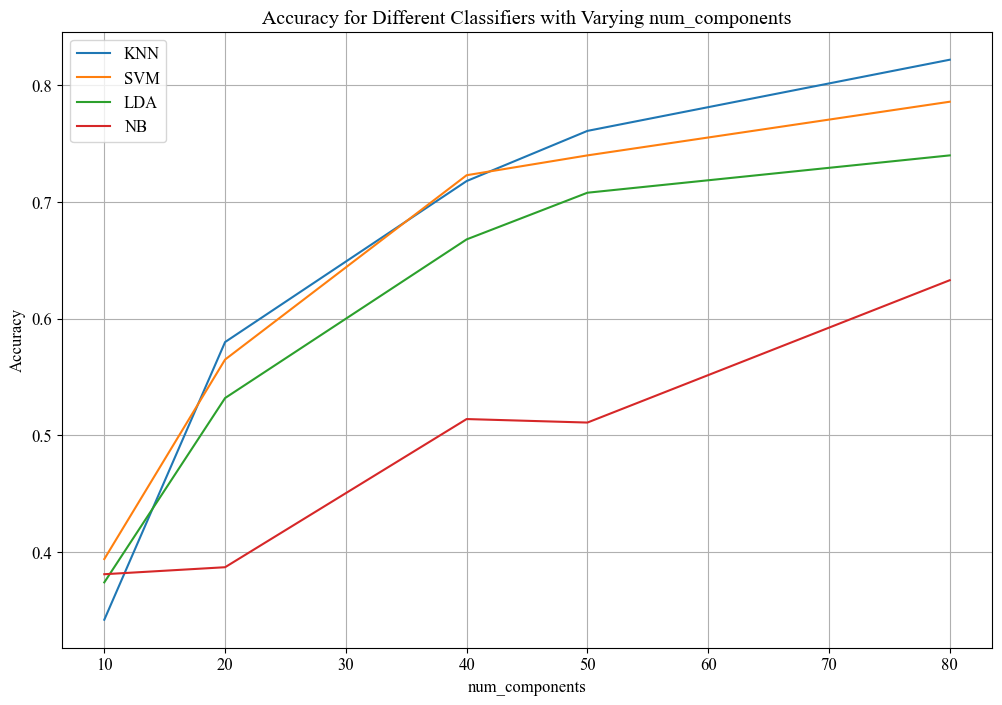

In [34]:
num_components_list = [10, 20, 40, 50, 80]

all_results = {}

for num_components in num_components_list:
    mi_selector = SelectKBest(score_func=mutual_info_classif, k=num_components)
    selected_features = mi_selector.fit_transform(selected_padded_images.reshape(num_samples,-1), selected_labels)

    X_train, X_test, y_train, y_test = train_test_split(selected_features, selected_labels, test_size=1000, random_state=42)

    classifiers = {
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "SVM": SVC(kernel='linear', probability=True),
        "LDA": LinearDiscriminantAnalysis(),
        "NB": GaussianNB()
    }

    results = {}

    for classifier_name, classifier in classifiers.items():
        # Train the classifier
        classifier.fit(X_train, y_train)

        # Evaluate the classifier
        y_pred = classifier.predict(X_test)

        # Store evaluation results
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='micro')
        recall = recall_score(y_test, y_pred, average='micro')
        f1 = f1_score(y_test, y_pred, average='micro')
        cm = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)

        results[classifier_name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Confusion Matrix": cm,
            "Classification Report": classification_rep
        }

    all_results[num_components] = results

# Plot accuracy for each classifier with different num_components
plt.figure(figsize=(12, 8))
for classifier_name in classifiers.keys():
    accuracies = [result[classifier_name]['Accuracy'] for result in all_results.values()]
    plt.plot(num_components_list, accuracies, label=classifier_name)
plt.title("Accuracy for Different Classifiers with Varying num_components")
plt.xlabel("num_components")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


